# Modelos de aprednizado de máquinas voltados para tarefas de classificação

# 1. Importação e leitura dos dados

**Importação dos dados**

In [1]:
# Package
library(quantmod)

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.


**Leitura dos dados**

In [2]:
getSymbols("^GSPC", from = '2000-01-01', to = '2021-05-31')   # dataset escolhido: US

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.



[1] "^GSPC"

# 2. Inspeção do dataset

**Inspeção da frequência dos dados**

In [3]:
periodicity(GSPC)

Daily periodicity from 2000-01-03 to 2021-04-14 

**Inspeção das primeiras linhas**

In [4]:
head(GSPC)

           GSPC.Open GSPC.High GSPC.Low GSPC.Close GSPC.Volume GSPC.Adjusted
2000-01-03   1469.25   1478.00  1438.36    1455.22   931800000       1455.22
2000-01-04   1455.22   1455.22  1397.43    1399.42  1009000000       1399.42
2000-01-05   1399.42   1413.27  1377.68    1402.11  1085500000       1402.11
2000-01-06   1402.11   1411.90  1392.10    1403.45  1092300000       1403.45
2000-01-07   1403.45   1441.47  1400.73    1441.47  1225200000       1441.47
2000-01-10   1441.47   1464.36  1441.47    1457.60  1064800000       1457.60

**Análise gráfica**

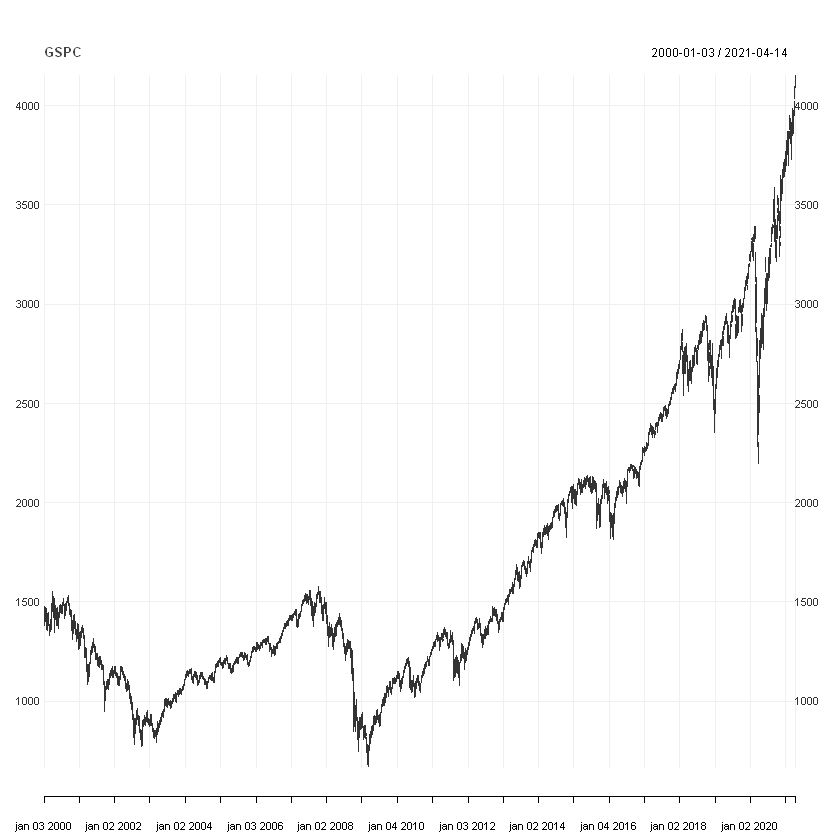

In [5]:
chart_Series(GSPC)

# 3. Construção das variáveis

In [6]:
# Package
library(TTR)

In [7]:
v.excluded <- c('GSPC.Open', 'GSPC.Volume', 'GSPC.Adjusted')

GSPC2 <- GSPC[, !(names(GSPC) %in% v.excluded)]

In [8]:
dim(GSPC2)

[1] 5354    3

## 3.1. Variáveis técnicas

In [9]:
# Log-Returns
GSPC.Return <- ts(round(log(GSPC2$GSPC.Close) - log(Lag(GSPC2$GSPC.Close, 1)), 2))

# Simple moving average (SMA)
GSPC.SMA <- ts(round(SMA(GSPC2$GSPC.Close, 10), 2))  # 10 days

# Weighted moving average (WMA)
GSPC.WMA <- ts(round(WMA(GSPC2$GSPC.Close, 10), 2))  # 10 days

# Standard deviation (STD)
GSPC.STD10 <- ts(round(rollapply(GSPC$GSPC.Close, 10, sd), 2))

# Momentum (mom)
GSPC.MOM <- ts(round(momentum(GSPC2$GSPC.Close, n = 1), 2))

# Rate Of Change (ROC)
GSPC.ROC <- ts(round(ROC(GSPC2$GSPC.Close), 2))

# Stochastic K% AND D%
GSPC.StochK <- ts(round(stoch(GSPC2)$fastK, 2))    # fastK
GSPC.StochD <- ts(round(stoch(GSPC2)$fastD, 2))    # fastD

# Relative Strength Index (RSI)
GSPC.RSI <- ts(round(RSI(GSPC2$GSPC.Close, n = 7, maType = "SMA"), 2))

# William's %R (WPR)
GSPC.WPR <- ts(round(WPR(GSPC2, n = 14), 2))

# The Average Direction Index (trend strength) (ADX) & The Direction Index (DX)
GSPC.ADX <- ts(round(ADX(GSPC2)$ADX, 2))
GSPC.DX <- ts(round(ADX(GSPC2)$DX, 2))

# Commodity Channel Index (CCI)
GSPC.CCI <- ts(round(CCI(GSPC2), 2))

# Chande Momentum Oscillator (CMO)
GSPC.CMO <- ts(round(CMO(GSPC$GSPC.Close), 2))

# Triple Smoothed Exponential Oscillator (TRIX)
GSPC.TRIX <- ts(round(TRIX(GSPC$GSPC.Close)$TRIX, 2))

# Moving Average Convergence Divergence (MACD)
GSPC.MACD <- ts(round(MACD(GSPC2$GSPC.Close, 12, 26, 9, maType = "EMA")$macd, 2))
GSPC.Signal <- ts(round(MACD(GSPC2$GSPC.Close, 12, 26, 9, maType = "EMA")$signal, 2))
GSPC.Histogram <- ts(round(GSPC.MACD - GSPC.Signal, 2))

# Bollinger Bands (BBANDS)
GSPC.bbup <- BBands(GSPC2, n = 20, sd = 2)$up
GSPC.bbdn <- BBands(GSPC2, n = 20, sd = 2)$dn
GSPC.BBANDS <- ts(round(GSPC.bbup - GSPC.bbdn, 2))

In [10]:
v.technical <- cbind(GSPC.Return, GSPC.SMA, GSPC.WMA, GSPC.STD10, GSPC.MOM, GSPC.ROC, GSPC.StochK, GSPC.StochD, GSPC.RSI,
                     GSPC.WPR, GSPC.ADX, GSPC.DX, GSPC.CCI, GSPC.CMO, GSPC.TRIX, GSPC.MACD, GSPC.Signal, GSPC.Histogram,
                     GSPC.BBANDS)

In [11]:
dim(v.technical)

[1] 5354   19

In [12]:
GSPC.df <- as.data.frame(cbind(GSPC2, v.technical))
head(GSPC.df)

GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.WPR,GSPC.ADX,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS
1478.00,1438.36,1455.22,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1455.22,1397.43,1399.42,-0.04,NA,NA,NA,-55.80,-0.04,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1413.27,1377.68,1402.11,0.00,NA,NA,NA,2.69,0.00,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1411.90,1392.10,1403.45,0.00,NA,NA,NA,1.34,0.00,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1441.47,1400.73,1441.47,0.03,NA,NA,NA,38.02,0.03,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1464.36,1441.47,1457.60,0.01,NA,NA,NA,16.13,0.01,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [13]:
tail(GSPC.df)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.WPR,GSPC.ADX,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS
5349,4083.13,4068.31,4079.95,0.00,3992.74,4024.97,68.48,6.01,0.00,0.97,...,0.03,14.71,28.62,188.90,28.55,0.10,1.17,0.83,0.34,216.26
5350,4098.19,4082.54,4097.17,0.00,4013.54,4043.96,65.03,17.22,0.00,1.00,...,0.00,15.95,32.02,171.60,55.19,0.10,1.28,0.92,0.36,236.34
5351,4129.48,4095.51,4128.80,0.01,4035.47,4064.92,62.99,31.63,0.01,1.00,...,0.00,17.56,38.55,164.62,60.16,0.11,1.40,1.01,0.39,265.99
5352,4131.76,4114.82,4127.99,0.00,4050.82,4081.74,65.15,-0.81,0.00,0.99,...,0.01,19.10,39.01,141.75,56.47,0.12,1.48,1.11,0.37,290.15
5353,4148.00,4124.43,4141.59,0.00,4067.87,4098.24,64.27,13.60,0.00,0.98,...,0.02,20.75,42.33,130.61,73.27,0.13,1.56,1.20,0.36,315.02
5354,4151.69,4137.77,4141.93,0.00,4086.20,4111.71,55.13,0.34,0.00,0.97,...,0.03,22.35,43.08,117.05,85.89,0.14,1.59,1.28,0.31,337.20


## 3.2. Variáveis de direção

In [14]:
# Direção numérica
GSPC.Direction <- NULL
GSPC.Direction[GSPC2$GSPC.Close >= lag(GSPC2$GSPC.Close, 1)] <- 1           # P(t) >= P(t-1)
GSPC.Direction[GSPC2$GSPC.Close < lag(GSPC2$GSPC.Close, 1)] <- 0            # P(t) < P(t-1)

In [15]:
# Direção não numérica
GSPC.Trend <- NULL
GSPC.Trend[GSPC2$GSPC.Close > Lag(GSPC2$GSPC.Close, 1)] <- "up"             # P(t) > P(t-1)
GSPC.Trend[GSPC2$GSPC.Close < Lag(GSPC2$GSPC.Close, 1)] <- "down"           # P(t) < P(t-1)
GSPC.Trend[GSPC2$GSPC.Close == Lag(GSPC2$GSPC.Close, 1)] <- "nowhere"       # P(t) = P(t-1)

In [16]:
head(cbind(GSPC.Direction, GSPC.Trend))

GSPC.Direction,GSPC.Trend
NA,NA
0,down
1,up
1,up
1,up
1,up


In [17]:
tail(cbind(GSPC.Direction, GSPC.Trend))

,GSPC.Direction,GSPC.Trend
"[5349,]",1,up
"[5350,]",1,up
"[5351,]",1,up
"[5352,]",0,down
"[5353,]",1,up
"[5354,]",1,up


In [18]:
# Agregando as séries de direção ao dataset
GSPC.df1 <- as.data.frame(cbind(GSPC.df, GSPC.Direction, GSPC.Trend))
tail(GSPC.df1)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS,GSPC.Direction,GSPC.Trend
5349,4083.13,4068.31,4079.95,0.00,3992.74,4024.97,68.48,6.01,0.00,0.97,...,28.62,188.90,28.55,0.10,1.17,0.83,0.34,216.26,1,up
5350,4098.19,4082.54,4097.17,0.00,4013.54,4043.96,65.03,17.22,0.00,1.00,...,32.02,171.60,55.19,0.10,1.28,0.92,0.36,236.34,1,up
5351,4129.48,4095.51,4128.80,0.01,4035.47,4064.92,62.99,31.63,0.01,1.00,...,38.55,164.62,60.16,0.11,1.40,1.01,0.39,265.99,1,up
5352,4131.76,4114.82,4127.99,0.00,4050.82,4081.74,65.15,-0.81,0.00,0.99,...,39.01,141.75,56.47,0.12,1.48,1.11,0.37,290.15,0,down
5353,4148.00,4124.43,4141.59,0.00,4067.87,4098.24,64.27,13.60,0.00,0.98,...,42.33,130.61,73.27,0.13,1.56,1.20,0.36,315.02,1,up
5354,4151.69,4137.77,4141.93,0.00,4086.20,4111.71,55.13,0.34,0.00,0.97,...,43.08,117.05,85.89,0.14,1.59,1.28,0.31,337.20,1,up


**Inspeção da estrutura do dataset**

In [19]:
str(GSPC.df1)

'data.frame':	5354 obs. of  24 variables:
 $ GSPC.High     : num  1478 1455 1413 1412 1441 ...
 $ GSPC.Low      : num  1438 1397 1378 1392 1401 ...
 $ GSPC.Close    : num  1455 1399 1402 1403 1441 ...
 $ GSPC.Return   : num  NA -0.04 0 0 0.03 0.01 -0.01 0 0.01 0.01 ...
 $ GSPC.SMA      : num  NA NA NA NA NA ...
 $ GSPC.WMA      : num  NA NA NA NA NA ...
 $ GSPC.STD10    : num  NA NA NA NA NA NA NA NA NA 24.6 ...
 $ GSPC.MOM      : num  NA -55.8 2.69 1.34 38.02 ...
 $ GSPC.ROC      : num  NA -0.04 0 0 0.03 0.01 -0.01 0 0.01 0.01 ...
 $ GSPC.StochK   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.StochD   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.RSI      : num  NA NA NA NA NA ...
 $ GSPC.WPR      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.ADX      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.DX       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.CCI      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.CMO      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.TRIX 

# 4. Análise exploratória dos dados

## 4.1. Dados ausentes

**Identificação dos dados ausentes**

In [20]:
round(prop.table(table(is.na(GSPC.df1)))*100, digits = 2)[2]

# Mesmo com os NA's nas primeiras linhas e nas últimas linhas, o % de NA's total é inferior a 1%

TRUE 
0.25

**Remoção dos dados ausentes**

In [21]:
GSPC.df2 <- na.omit(GSPC.df1)
round(prop.table(table(is.na(GSPC.df2)))*100, digits = 2)[2]

<NA> 
  NA

**Inspeção da estrutura dos dados**

In [22]:
str(GSPC.df2)

'data.frame':	5296 obs. of  24 variables:
 $ GSPC.High     : num  1535 1527 1521 1517 1520 ...
 $ GSPC.Low      : num  1518 1507 1497 1475 1484 ...
 $ GSPC.Close    : num  1524 1508 1509 1488 1499 ...
 $ GSPC.Return   : num  0 -0.01 0 -0.01 0.01 0 -0.01 0 0.01 0.01 ...
 $ GSPC.SMA      : num  1470 1485 1497 1500 1503 ...
 $ GSPC.WMA      : num  1497 1504 1508 1506 1506 ...
 $ GSPC.STD10    : num  57.4 42.8 27.9 24.8 21.5 ...
 $ GSPC.MOM      : num  -3.6 -16.13 0.79 -20.6 10.66 ...
 $ GSPC.ROC      : num  0 -0.01 0 -0.01 0.01 0 -0.01 0 0.01 0.01 ...
 $ GSPC.StochK   : num  0.86 0.77 0.77 0.67 0.72 0.76 0.64 0.52 0.62 0.73 ...
 $ GSPC.StochD   : num  0.9 0.84 0.8 0.74 0.72 0.72 0.71 0.64 0.59 0.62 ...
 $ GSPC.RSI      : num  87 72 78.4 46 48.7 ...
 $ GSPC.WPR      : num  0.14 0.23 0.23 0.33 0.28 0.24 0.36 0.48 0.38 0.27 ...
 $ GSPC.ADX      : num  26.4 27.3 27.7 27 26.5 ...
 $ GSPC.DX       : num  47 39.2 32.7 18.7 19.7 ...
 $ GSPC.CCI      : num  130.5 101.7 85.4 59.7 62.6 ...
 $ GSPC.C

Como as análises exploratória e o preprocessamento de dados focam nas features, a partir deste momento trabalharemos com o dataframe sem as variáveis de direção.

In [23]:
v.direction <- c('GSPC.Direction', 'GSPC.Trend')
GSPC.df3 <- GSPC.df2[, !(names(GSPC.df2) %in% v.direction)]

In [24]:
str(GSPC.df3)

'data.frame':	5296 obs. of  22 variables:
 $ GSPC.High     : num  1535 1527 1521 1517 1520 ...
 $ GSPC.Low      : num  1518 1507 1497 1475 1484 ...
 $ GSPC.Close    : num  1524 1508 1509 1488 1499 ...
 $ GSPC.Return   : num  0 -0.01 0 -0.01 0.01 0 -0.01 0 0.01 0.01 ...
 $ GSPC.SMA      : num  1470 1485 1497 1500 1503 ...
 $ GSPC.WMA      : num  1497 1504 1508 1506 1506 ...
 $ GSPC.STD10    : num  57.4 42.8 27.9 24.8 21.5 ...
 $ GSPC.MOM      : num  -3.6 -16.13 0.79 -20.6 10.66 ...
 $ GSPC.ROC      : num  0 -0.01 0 -0.01 0.01 0 -0.01 0 0.01 0.01 ...
 $ GSPC.StochK   : num  0.86 0.77 0.77 0.67 0.72 0.76 0.64 0.52 0.62 0.73 ...
 $ GSPC.StochD   : num  0.9 0.84 0.8 0.74 0.72 0.72 0.71 0.64 0.59 0.62 ...
 $ GSPC.RSI      : num  87 72 78.4 46 48.7 ...
 $ GSPC.WPR      : num  0.14 0.23 0.23 0.33 0.28 0.24 0.36 0.48 0.38 0.27 ...
 $ GSPC.ADX      : num  26.4 27.3 27.7 27 26.5 ...
 $ GSPC.DX       : num  47 39.2 32.7 18.7 19.7 ...
 $ GSPC.CCI      : num  130.5 101.7 85.4 59.7 62.6 ...
 $ GSPC.C

## 4.2. Estatística descritiva

In [25]:
summary(GSPC.df3)

   GSPC.High         GSPC.Low        GSPC.Close      GSPC.Return        
 Min.   : 695.3   Min.   : 666.8   Min.   : 676.5   Min.   :-0.1300000  
 1st Qu.:1173.0   1st Qu.:1155.4   1st Qu.:1164.7   1st Qu.: 0.0000000  
 Median :1401.2   Median :1379.8   Median :1391.3   Median : 0.0000000  
 Mean   :1695.5   Mean   :1675.2   Mean   :1685.9   Mean   : 0.0001548  
 3rd Qu.:2097.1   3rd Qu.:2079.4   3rd Qu.:2088.9   3rd Qu.: 0.0100000  
 Max.   :4151.7   Max.   :4137.8   Max.   :4141.9   Max.   : 0.1100000  
    GSPC.SMA         GSPC.WMA        GSPC.STD10         GSPC.MOM        
 Min.   : 707.9   Min.   : 700.9   Min.   :  2.760   Min.   :-324.8900  
 1st Qu.:1162.9   1st Qu.:1162.6   1st Qu.:  9.938   1st Qu.:  -7.1675  
 Median :1392.3   Median :1392.7   Median : 14.905   Median :   0.9650  
 Mean   :1683.7   Mean   :1684.5   Mean   : 19.603   Mean   :   0.4937  
 3rd Qu.:2084.2   3rd Qu.:2085.7   3rd Qu.: 23.172   3rd Qu.:   8.9800  
 Max.   :4086.2   Max.   :4111.7   Max.   :245.110 

É possível analisar a frequência de cada direção não numérica

In [26]:
summary(GSPC.df2$GSPC.Trend)

down nowhere      up 
   2447       3    2846

## 4.3. Identificação de outliers

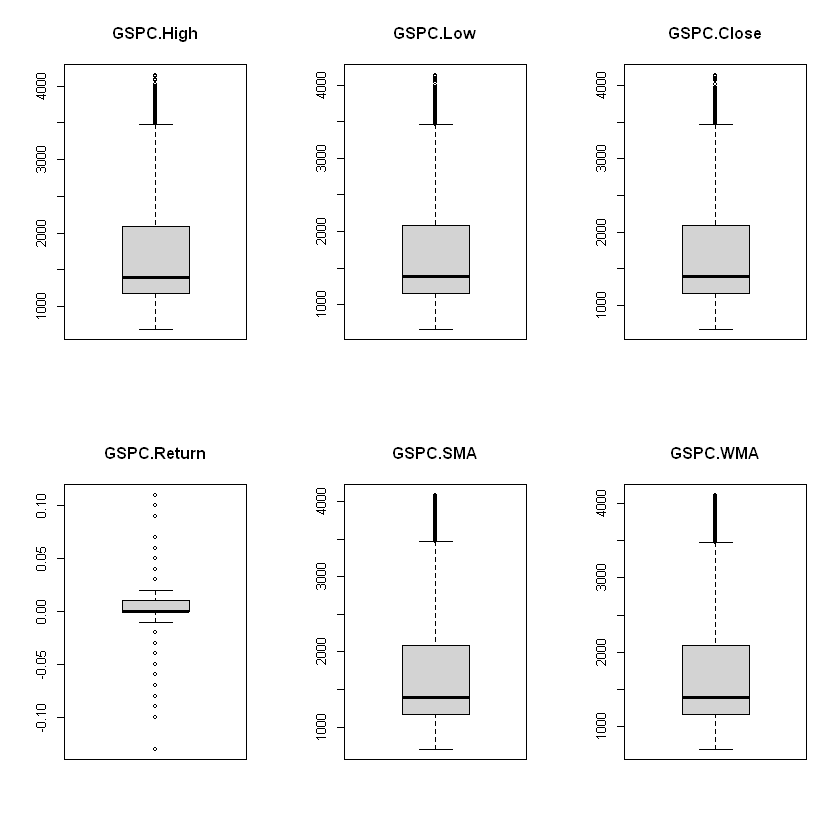

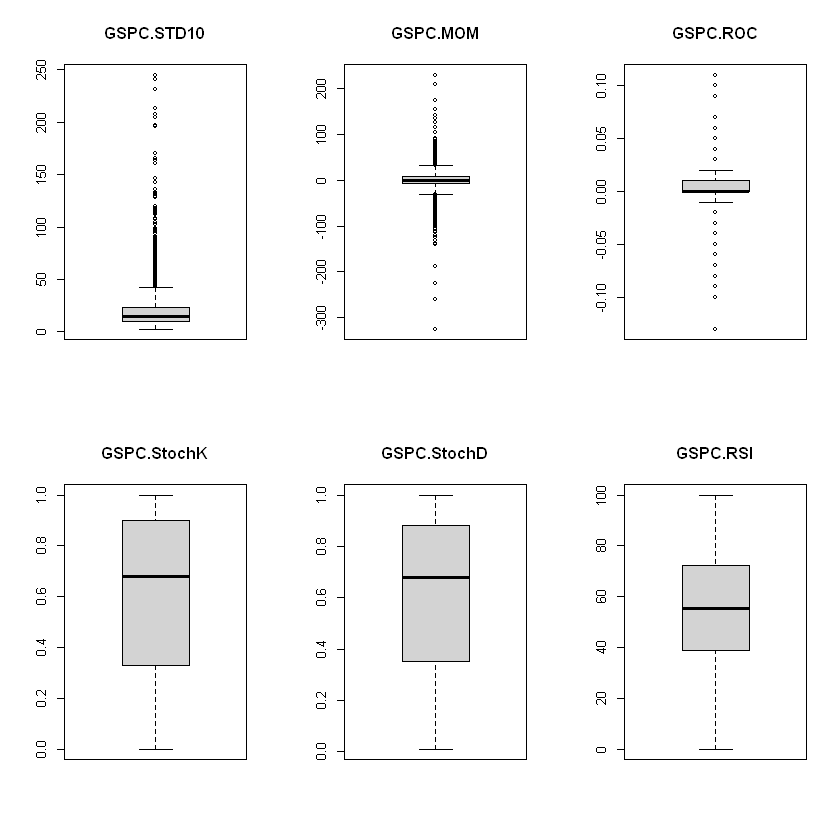

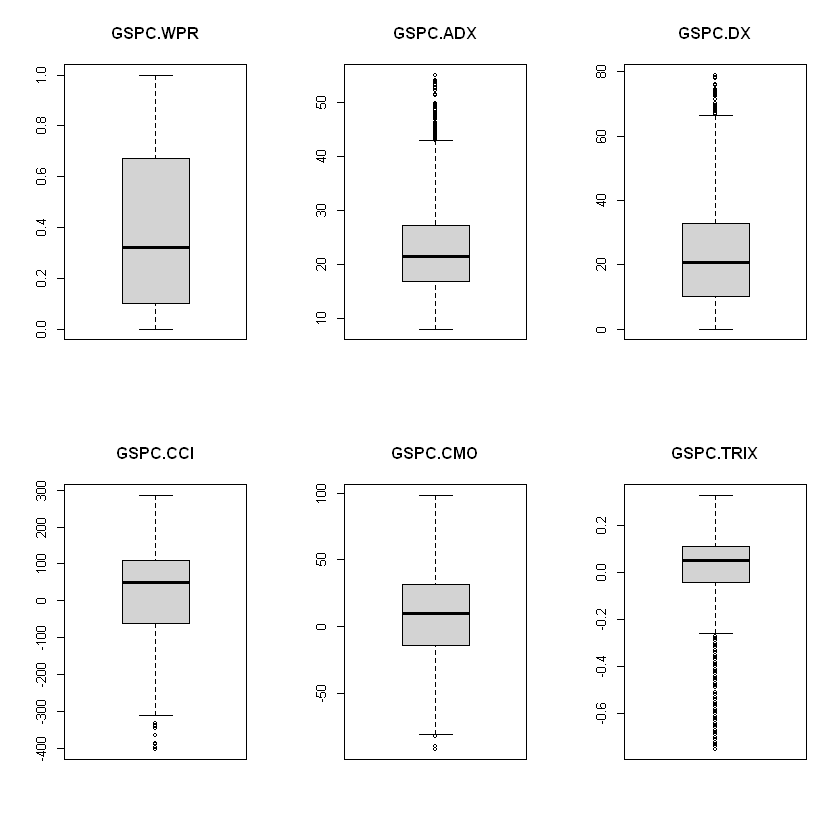

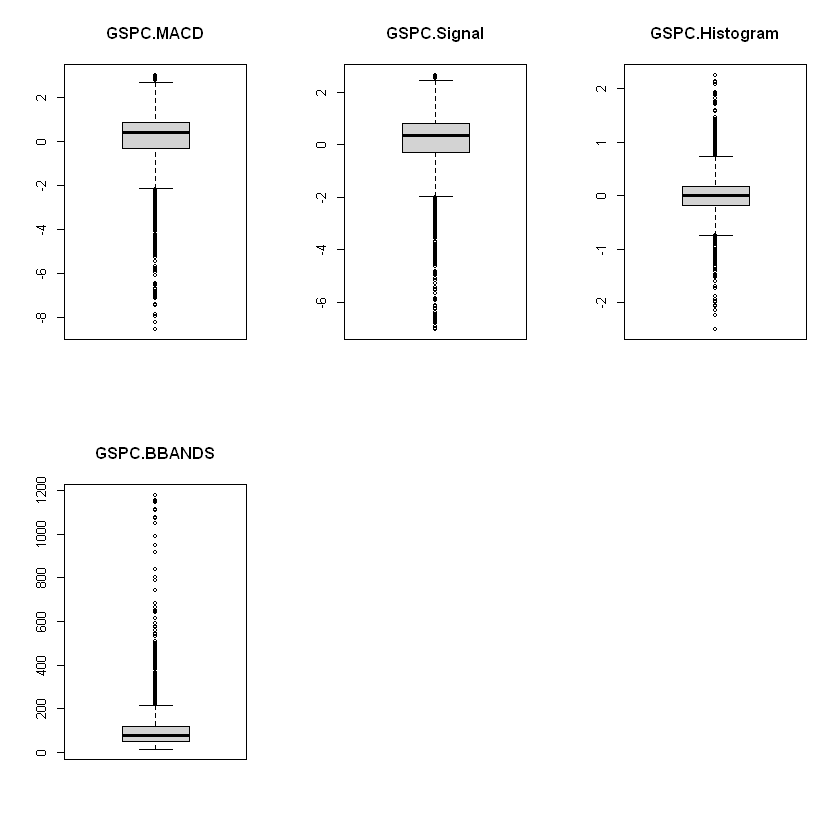

In [27]:
par(mfrow=c(2, 3))

for (column in colnames(GSPC.df3)){
    boxplot(GSPC.df3[,column], col = 'light grey', main = column, border = 'black', horizontal = FALSE)
}

## 4.4. Histogramas

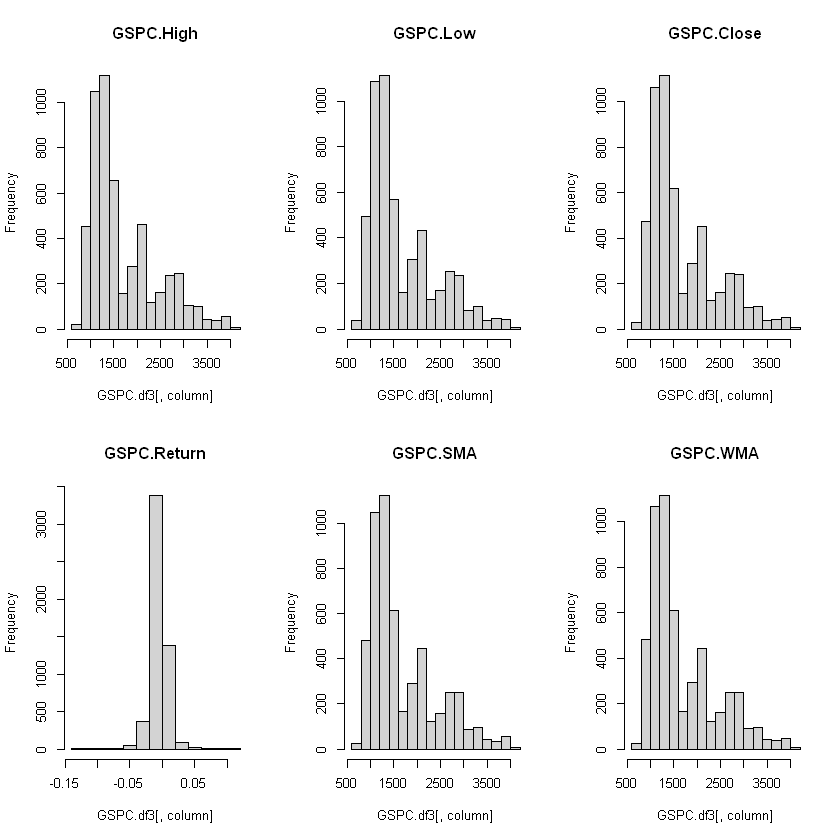

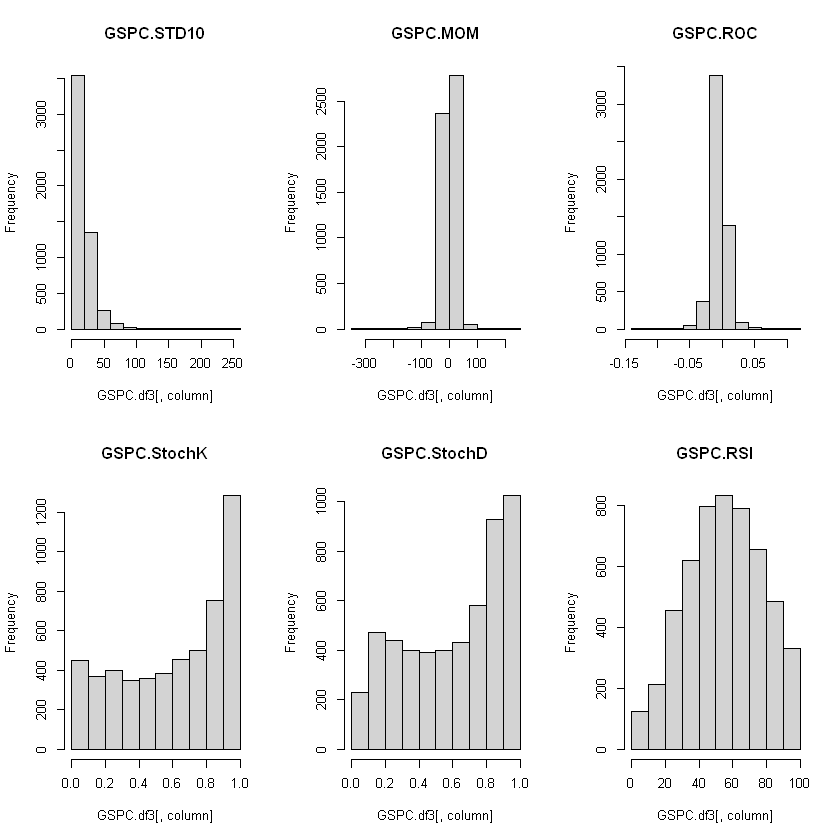

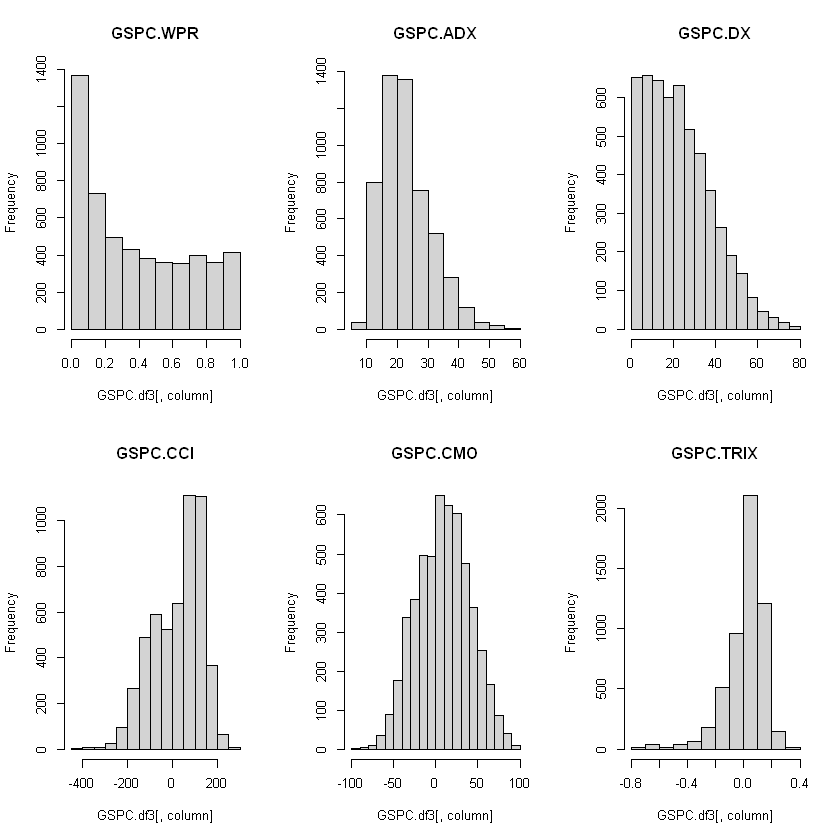

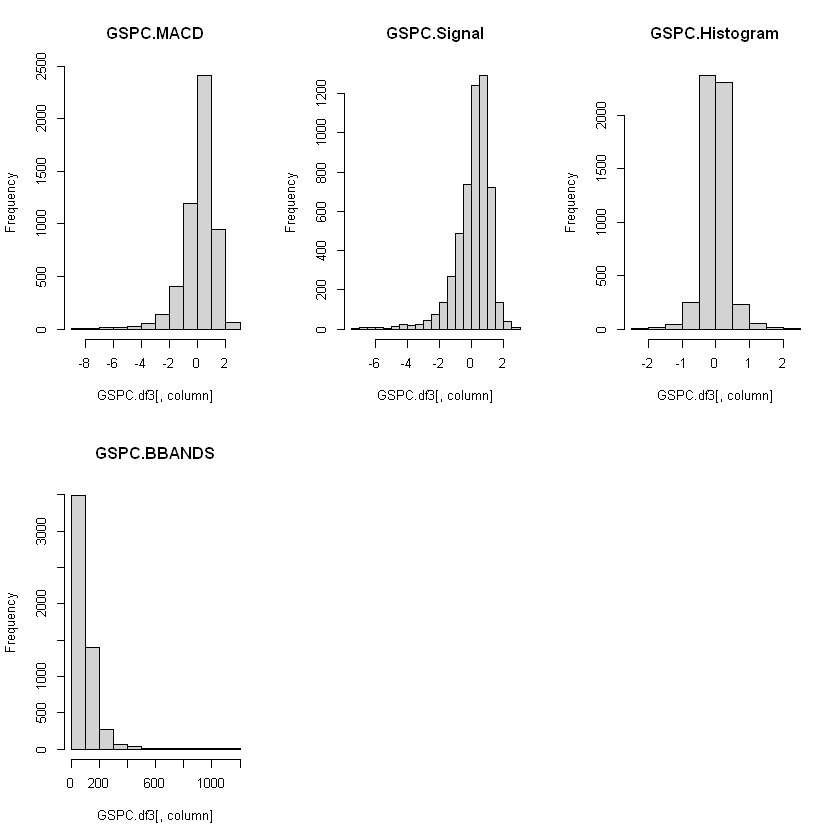

In [28]:
par(mfrow=c(2, 3))

for (column in colnames(GSPC.df3)){
    hist(GSPC.df3[,column], col = 'light grey', main = column, border = 'black')
}

## 4.5. Densidades

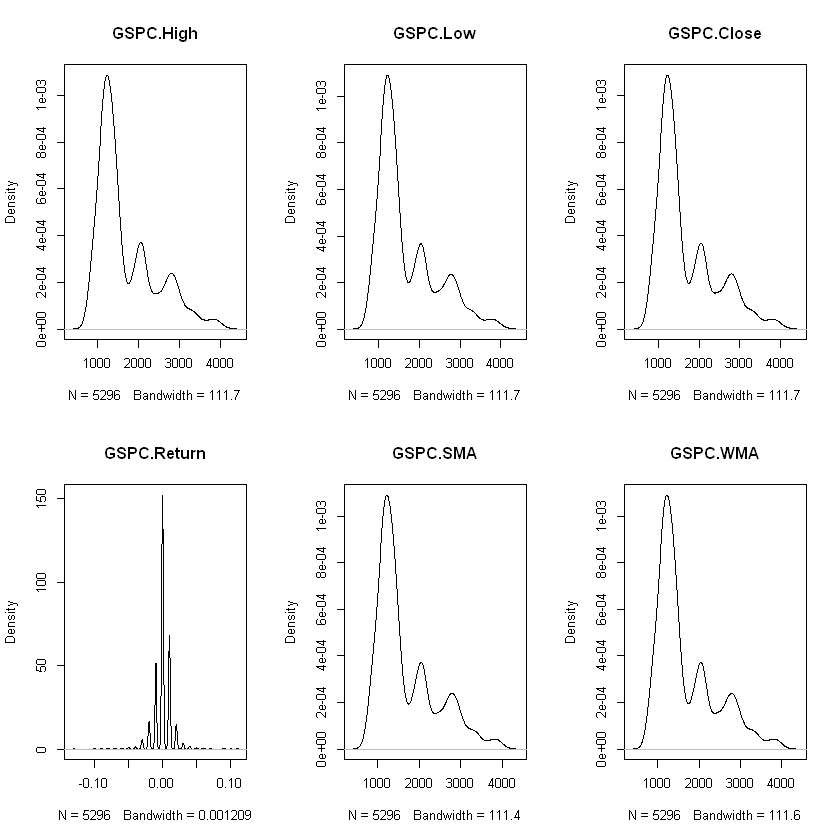

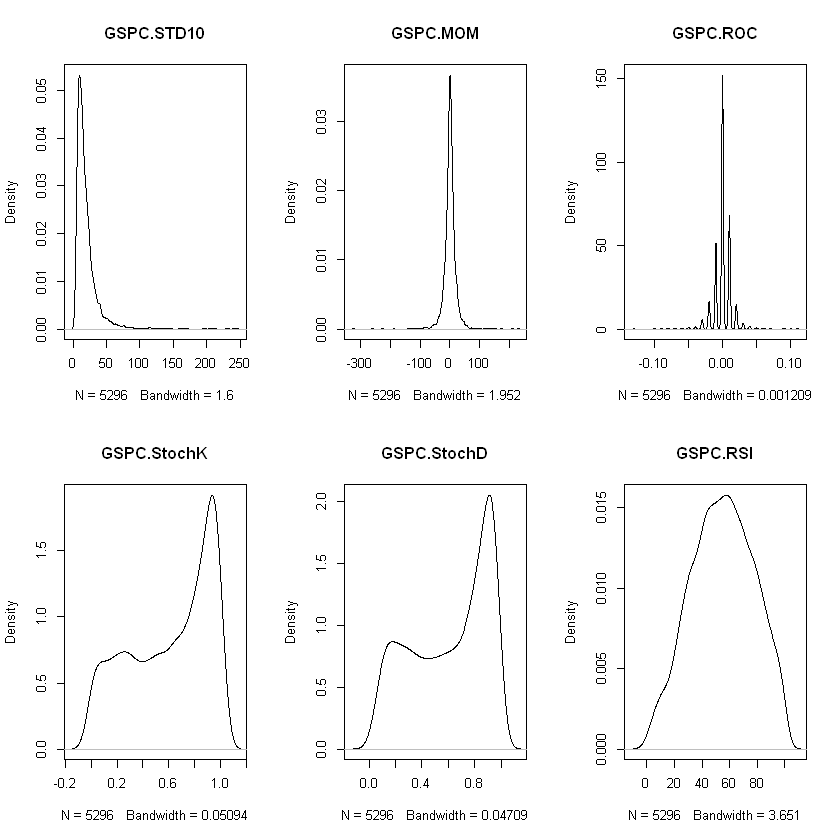

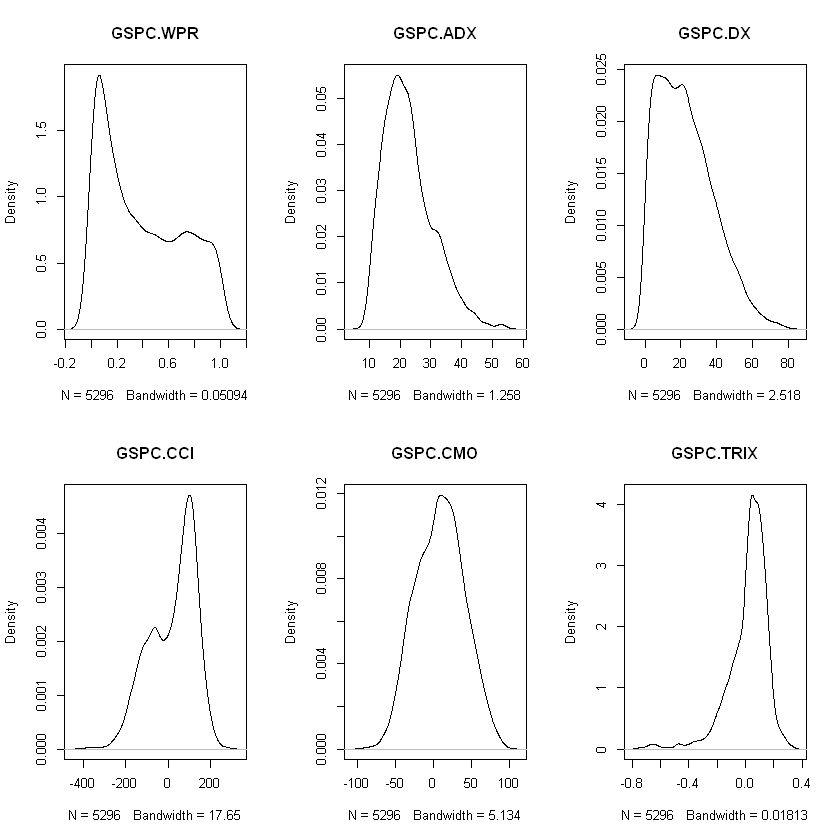

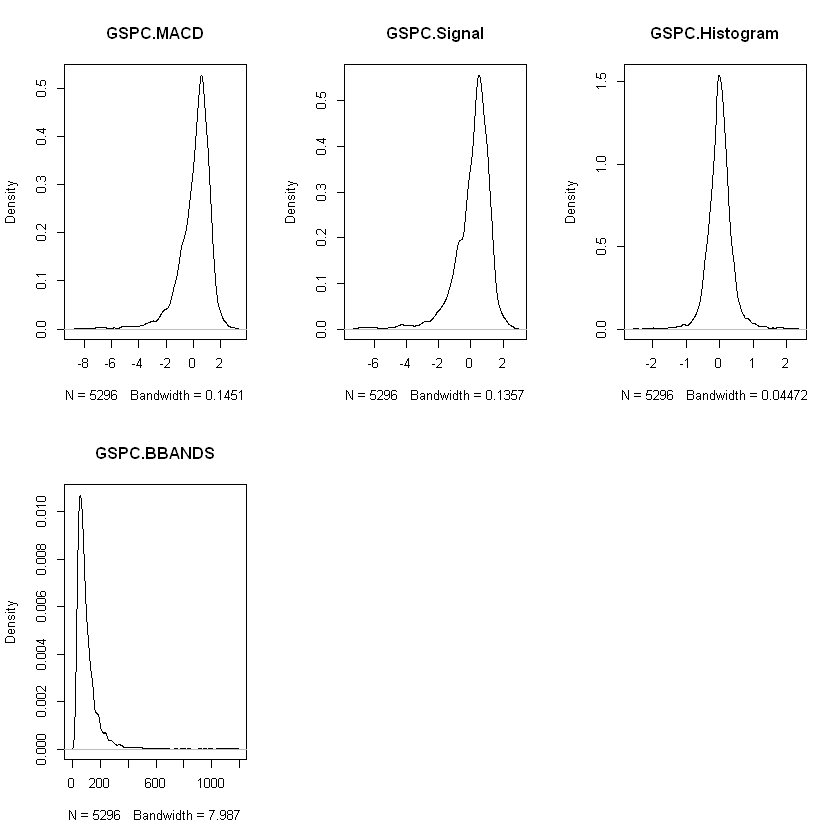

In [29]:
par(mfrow=c(2, 3))

for (column in colnames(GSPC.df3)){
    plot(density(GSPC.df3[,column]), main = column)
}

## 4.6. QQPlot

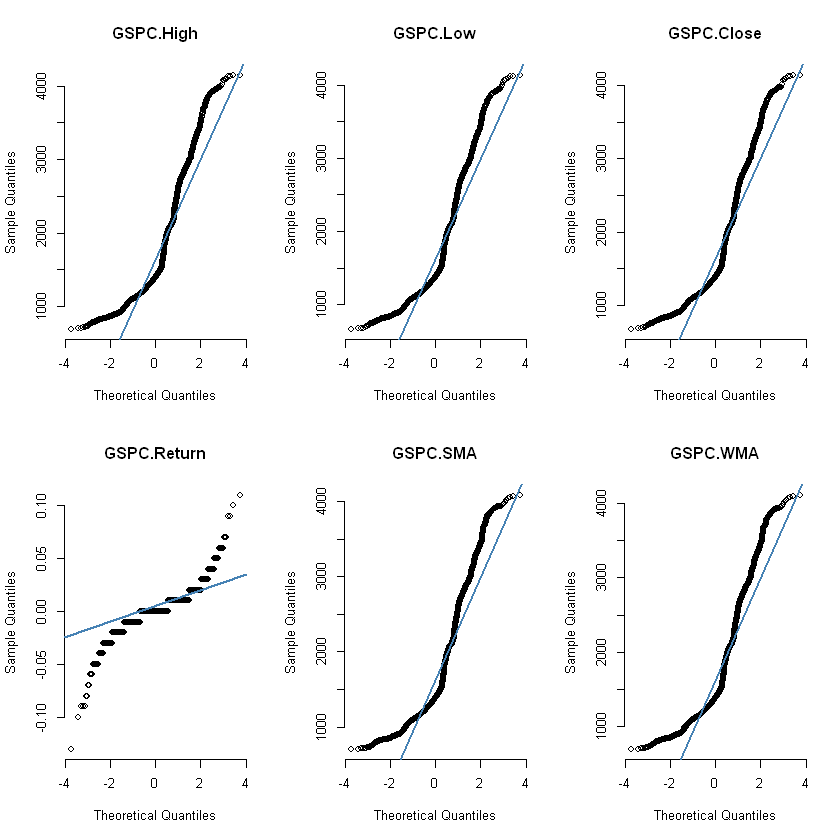

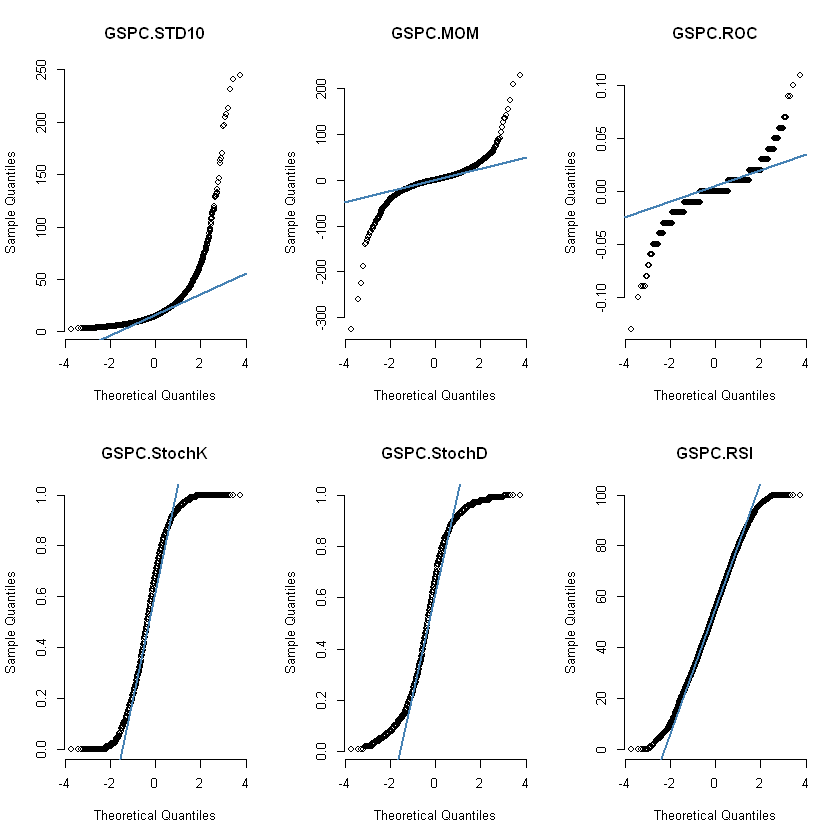

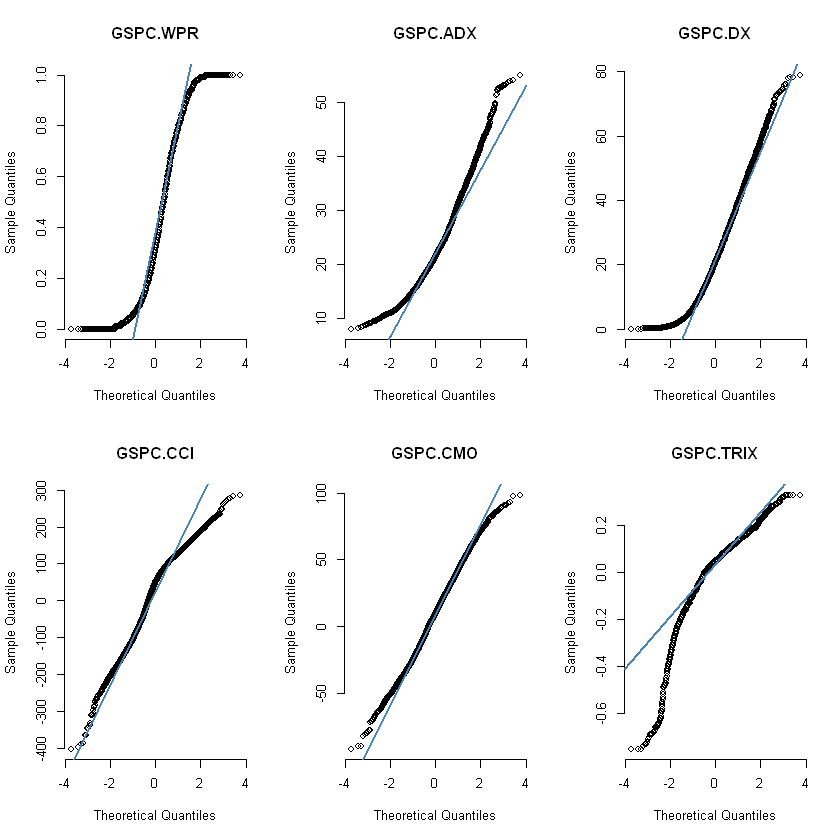

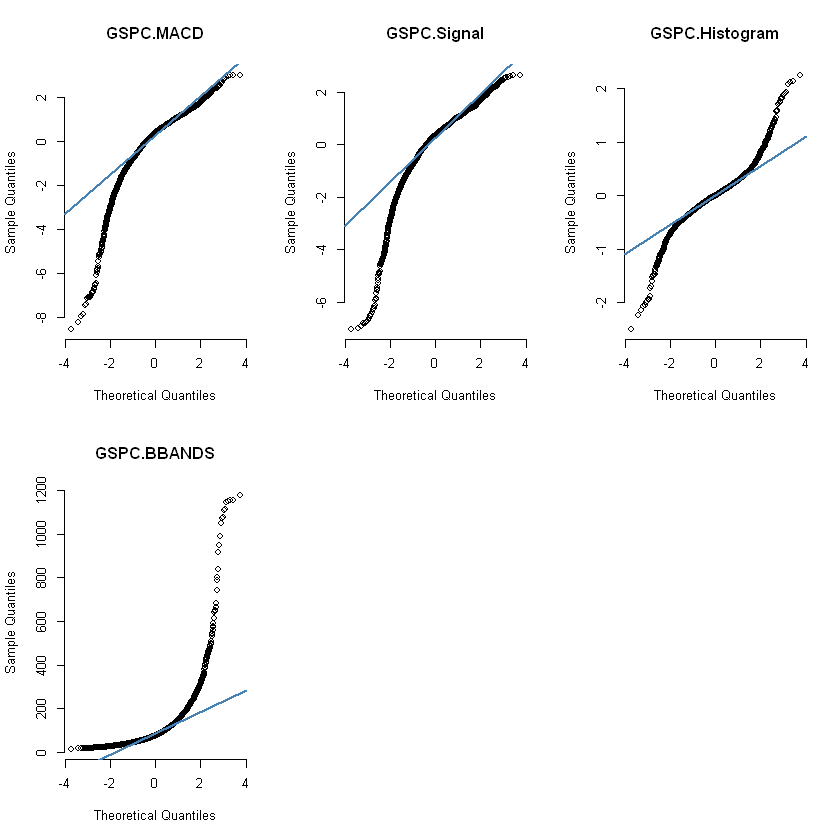

In [30]:
par(mfrow=c(2,3))

for (column in colnames(GSPC.df3)){
    qqnorm(GSPC.df3[,column], pch = 1, frame = FALSE, main = column)
    qqline(GSPC.df3[,column], col = "steelblue", lwd = 2)
}

## 4.6. Análise de correlação

In [31]:
# Package
library(corrplot)

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


In [32]:
# Cálculo das correlações
round(cor(GSPC.df3), digits = 2)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.WPR,GSPC.ADX,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS
GSPC.High,1.00,1.00,1.00,0.02,1.00,1.00,0.39,0.04,0.02,0.17,...,-0.17,-0.07,-0.04,0.15,0.18,0.22,0.19,0.20,0.01,0.41
GSPC.Low,1.00,1.00,1.00,0.02,1.00,1.00,0.38,0.04,0.02,0.18,...,-0.18,-0.08,-0.04,0.16,0.18,0.23,0.20,0.21,0.02,0.40
GSPC.Close,1.00,1.00,1.00,0.03,1.00,1.00,0.38,0.05,0.03,0.18,...,-0.18,-0.08,-0.04,0.15,0.18,0.23,0.20,0.20,0.01,0.40
GSPC.Return,0.02,0.02,0.03,1.00,0.01,0.01,-0.04,0.88,1.00,0.38,...,-0.38,0.00,-0.10,0.25,0.21,-0.01,0.05,0.00,0.16,-0.01
GSPC.SMA,1.00,1.00,1.00,0.01,1.00,1.00,0.40,0.03,0.01,0.15,...,-0.15,-0.07,-0.03,0.12,0.16,0.22,0.18,0.20,-0.02,0.41
GSPC.WMA,1.00,1.00,1.00,0.01,1.00,1.00,0.39,0.03,0.01,0.15,...,-0.15,-0.07,-0.03,0.13,0.17,0.23,0.19,0.20,-0.01,0.41
GSPC.STD10,0.39,0.38,0.38,-0.04,0.40,0.39,1.00,-0.04,-0.04,-0.11,...,0.11,0.25,0.23,-0.17,-0.21,-0.34,-0.42,-0.40,-0.14,0.85
GSPC.MOM,0.04,0.04,0.05,0.88,0.03,0.03,-0.04,1.00,0.88,0.37,...,-0.37,-0.01,-0.09,0.26,0.21,-0.01,0.05,0.00,0.16,-0.01
GSPC.ROC,0.02,0.02,0.03,1.00,0.01,0.01,-0.04,0.88,1.00,0.38,...,-0.38,0.00,-0.10,0.25,0.21,-0.01,0.05,0.00,0.16,-0.01
GSPC.StochK,0.17,0.18,0.18,0.38,0.15,0.15,-0.11,0.37,0.38,1.00,...,-1.00,-0.06,-0.16,0.91,0.81,0.16,0.47,0.28,0.67,-0.03


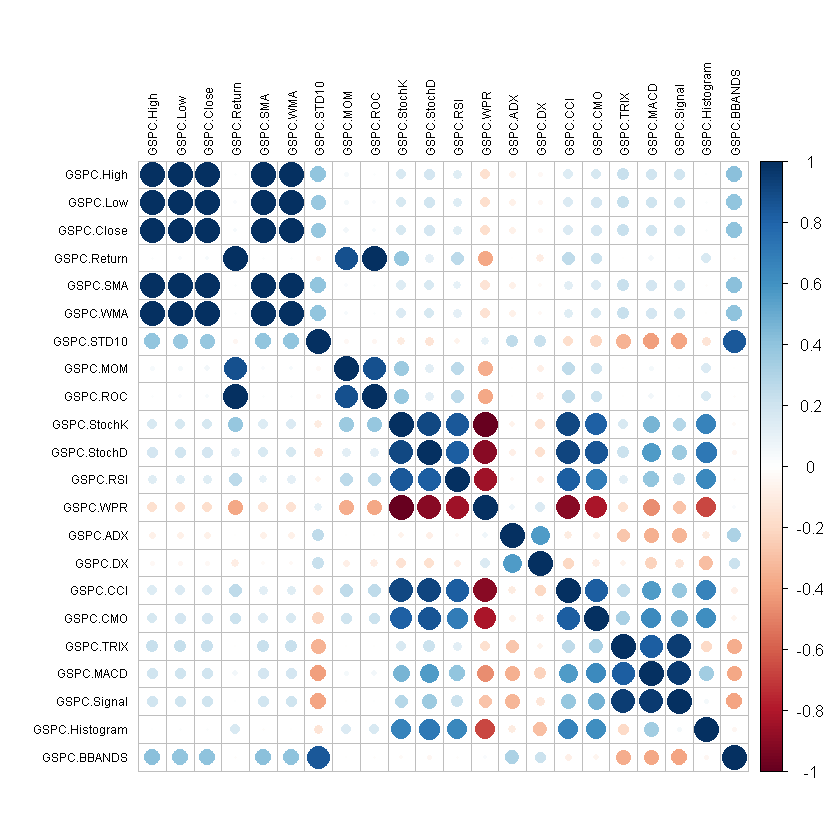

In [33]:
# Matriz de correlação
corrplot(cor(GSPC.df3), method = "circle", tl.col = "black", tl.cex = 0.6, tl.srt=90)

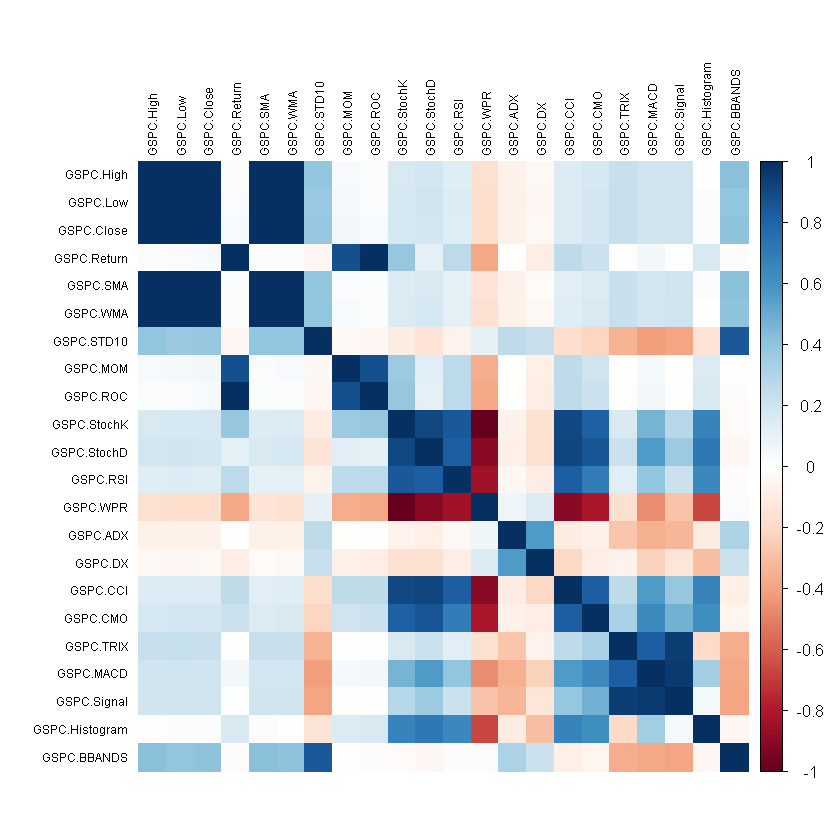

In [34]:
# Matriz de correlação
corrplot(cor(GSPC.df3), method = "color", tl.col = "black", tl.cex = 0.6, tl.srt=90)

# 5. Preprocessamento dos dados

## 5.1. Remoção dos *missing values*

A remoção dos dados ausentes foi realizada na seção anterior (análise exploratória de dados).

## 5.2. Tratamento dos outliers

In [35]:
# Função para substituição dos outliers pelos limietes do boxplot
outlier <- function(x){
    q1 = quantile(x, probs = .25, na.rm = T)
    q3 =  quantile(x, probs = .75, na.rm = T)
    iqr =  q3 - q1 
    li = q1 - 1.5*iqr
    ls = q3 + 1.5*iqr
    
    x[x < li] = li
    x[x > ls] = ls
    
    return (x)    
}

In [36]:
# Remoção dos outliers
GSPC.bp <- GSPC.df3
for (column in colnames(GSPC.df3)){
    GSPC.bp[,column] <- outlier(GSPC.df3[,column])
}

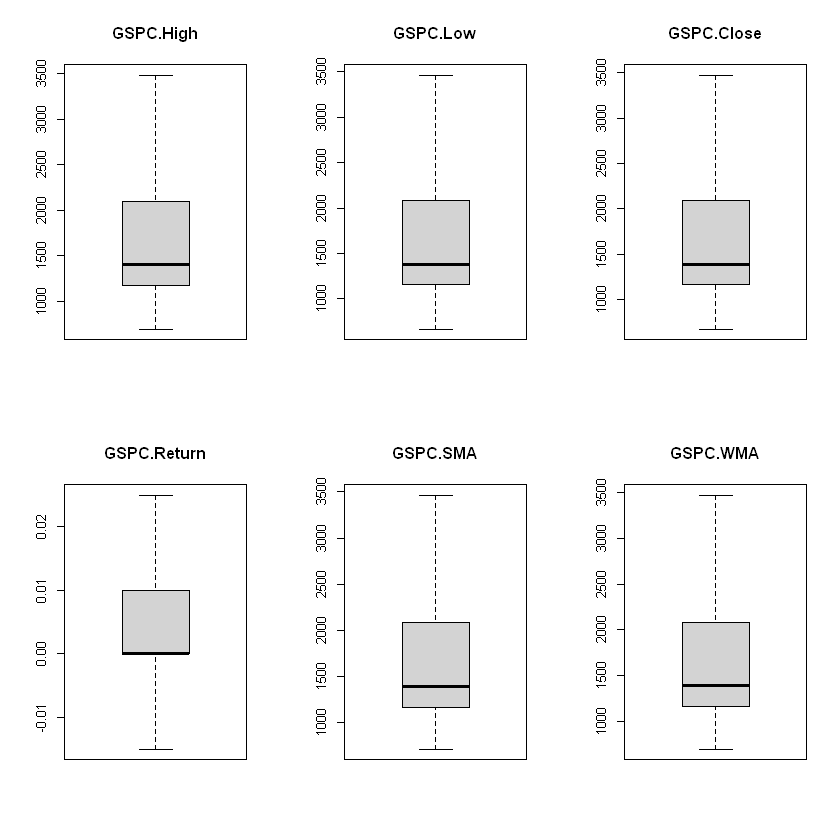

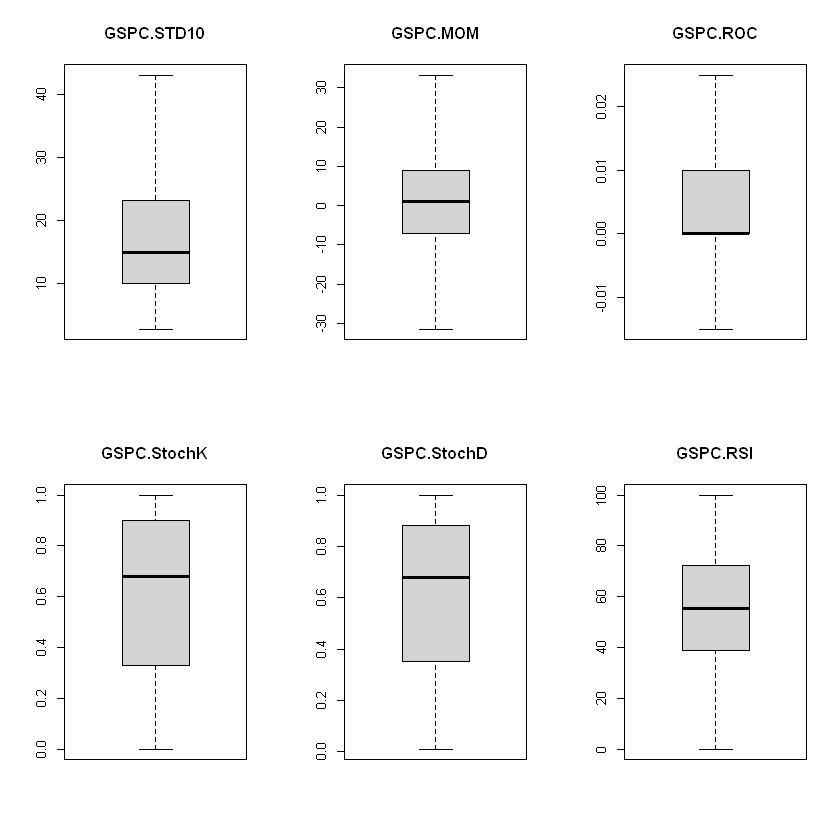

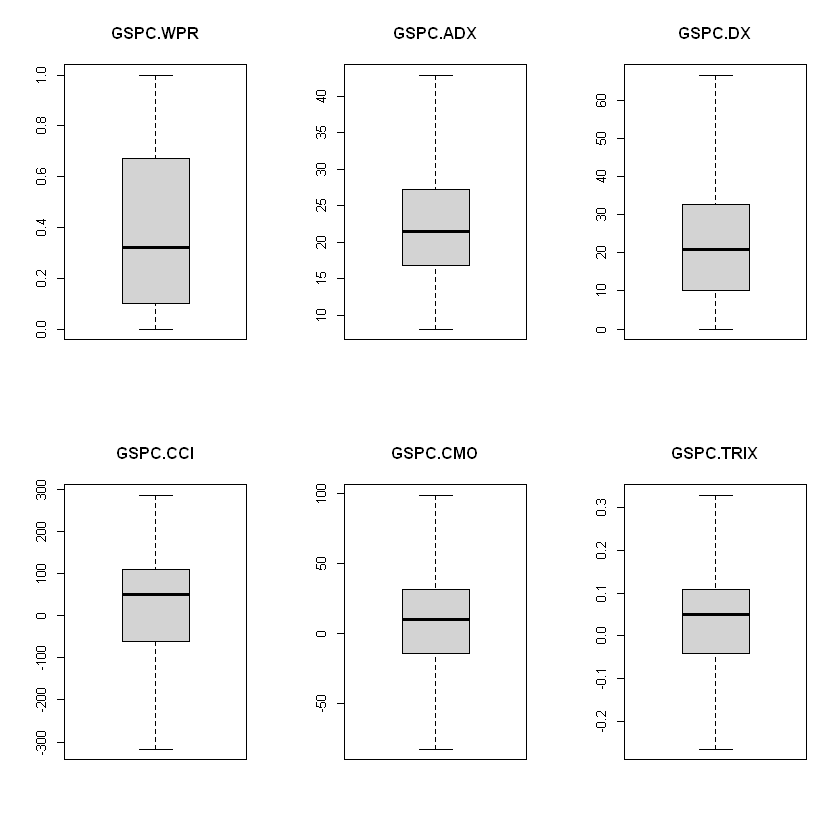

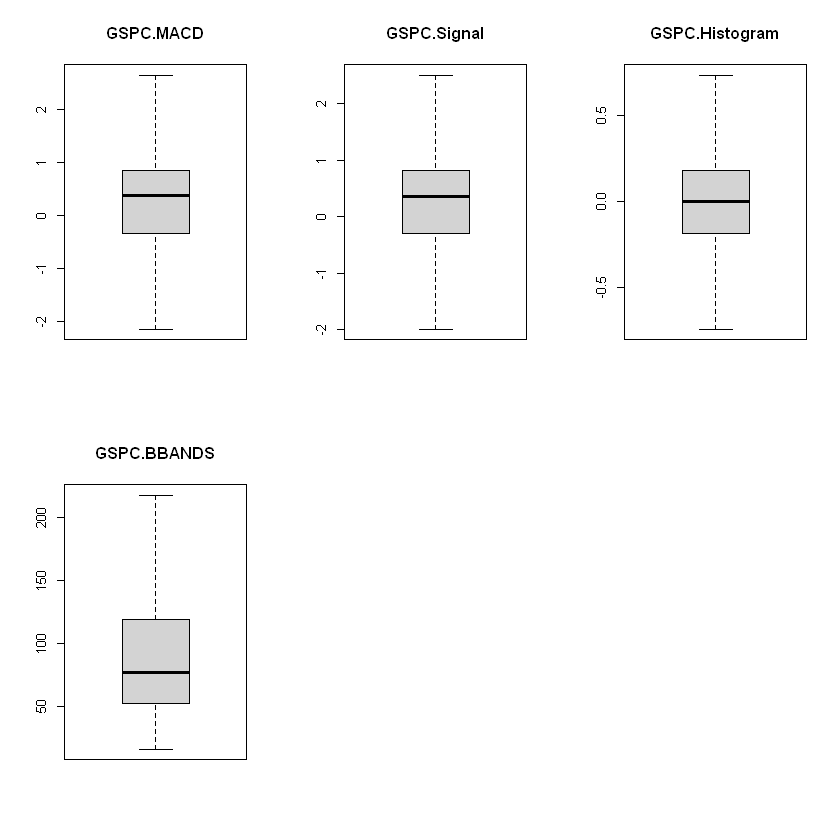

In [37]:
# Boxplot
par(mfrow=c(2, 3))

for (column in colnames(GSPC.bp)){
    boxplot(GSPC.bp[,column], col='light grey', main=column, border='black', horizontal=FALSE)
}

## 5.3. Normalização

**Normalização z-score**

In [38]:
# Função para normalização dos dados
normalize.zscore = function(x) {
    return ((x - mean(x)) / sd(x))
}

In [39]:
# Normalização z-score
GSPC.zscore <- GSPC.bp
for (column in colnames(GSPC.bp)){
    GSPC.zscore[,column] <- normalize.zscore(GSPC.bp[,column])
}

In [40]:
head(GSPC.zscore)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.WPR,GSPC.ADX,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS
59,-0.2188064,-0.2148310,-0.2214329,-0.08217814,-0.2962630,-0.2588267,2.3695103,-0.2995173612,-0.08217814,0.7925277,...,-0.7925277,0.4731199,1.5720027,0.9920454,1.6343688,0.2885589,2.254065,1.252625,2.3917426,2.368402
60,-0.2291535,-0.2311024,-0.2444458,-1.15944405,-0.2749835,-0.2491301,2.3500931,-1.1516333628,-1.15944405,0.5063618,...,-0.5063618,0.5910166,1.0651578,0.7264373,1.2944433,0.5425899,2.274638,1.482723,2.3917426,2.368402
61,-0.2375650,-0.2448980,-0.2433186,-0.08217814,-0.2583151,-0.2430805,0.9387980,-0.0009707333,-0.08217814,0.5063618,...,-0.5063618,0.6415438,0.6471081,0.5764631,1.0766638,0.7119440,2.264352,1.668993,2.2131579,2.368402
62,-0.2433576,-0.2775553,-0.2727089,-1.15944405,-0.2541050,-0.2454117,0.6423313,-1.4556204759,-1.15944405,0.1883997,...,-0.1883997,0.5586274,-0.2609349,0.3399476,0.8345814,0.8812980,2.110052,1.789521,1.3689395,2.368402
63,-0.2398990,-0.2636022,-0.2575003,0.99508777,-0.2492076,-0.2457406,0.3316569,0.6702491339,0.99508777,0.3473808,...,-0.3473808,0.4912579,-0.1980654,0.3668307,1.1060167,0.9659750,2.017473,1.855263,0.8818905,2.368402
64,-0.2578607,-0.2599101,-0.2469568,-0.08217814,-0.2421479,-0.2450398,-0.3834625,0.4478692995,-0.08217814,0.4745656,...,-0.4745656,0.4277750,-0.1980654,0.3100265,1.6176408,1.1353290,1.966039,1.910048,0.5571911,2.368402


**Normalização min-max**

In [41]:
# Função para normalização dos dados
normalize.minmax = function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

In [42]:
# Normalização - dados sem outliers
GSPC.minmax <- GSPC.bp
for (column in colnames(GSPC.bp)){
    GSPC.minmax[,column] <- normalize.minmax(GSPC.bp[,column])
}

In [43]:
head(GSPC.minmax)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.WPR,GSPC.ADX,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS
59,0.3010505,0.3043239,0.3027750,0.375,0.2764395,0.2874437,1.0000000,0.4302330,0.375,0.86,...,0.14,0.5240765,0.7046477,0.7415028,0.7921627,0.5462185,0.9437500,0.7385857,1.0000000,1
60,0.2984430,0.3002611,0.2970113,0.125,0.2818271,0.2898919,0.9949087,0.2362401,0.125,0.77,...,0.23,0.5502372,0.5874063,0.6936729,0.7327727,0.5966387,0.9479167,0.7853563,1.0000000,1
61,0.2963232,0.2968165,0.2972936,0.375,0.2860473,0.2914193,0.6248603,0.4982002,0.375,0.77,...,0.23,0.5614489,0.4907046,0.6666660,0.6947234,0.6302521,0.9458333,0.8232183,0.9628378,1
62,0.2948635,0.2886623,0.2899327,0.125,0.2871132,0.2908307,0.5471253,0.1670344,0.125,0.67,...,0.33,0.5430502,0.2806597,0.6240750,0.6524281,0.6638655,0.9145833,0.8477171,0.7871622,1
63,0.2957351,0.2921463,0.2937418,0.625,0.2883532,0.2907476,0.4656650,0.6510102,0.625,0.72,...,0.28,0.5281012,0.2952024,0.6289160,0.6998518,0.6806723,0.8958333,0.8610802,0.6858108,1
64,0.2912086,0.2930682,0.2963824,0.375,0.2901406,0.2909246,0.2781572,0.6003832,0.375,0.76,...,0.24,0.5140147,0.2952024,0.6186868,0.7892400,0.7142857,0.8854167,0.8722160,0.6182432,1


## 5.4. Seleção de atributos

In [44]:
Direction.df <- GSPC.df2[, (names(GSPC.df2) %in% v.direction)]

In [45]:
head(Direction.df)

,GSPC.Direction,GSPC.Trend
59,0,down
60,0,down
61,1,up
62,0,down
63,1,up
64,1,up


### 5.4.1. Classificação e seleção de atributos com base no algoritmo de *random forest*

In [46]:
# Package
library(Boruta)

Warning message:
"package 'Boruta' was built under R version 3.6.3"

**Dados z-score**

In [47]:
# Objeto de armazenamento dos resultados
set.seed(123)
GSPCboruta.zscore.output <- Boruta(Direction.df$GSPC.Trend ~., data = GSPC.zscore, doTrace = 0)
names(GSPCboruta.zscore.output)

[1] "finalDecision" "ImpHistory"    "pValue"        "maxRuns"      
 [5] "light"         "mcAdj"         "timeTaken"     "roughfixed"   
 [9] "call"          "impSource"

In [48]:
# Obtenção das variáveis de significância
GSPCboruta.zscore.signif <- getSelectedAttributes(GSPCboruta.zscore.output, withTentative = TRUE)
print(GSPCboruta.zscore.signif)

 [1] "GSPC.High"      "GSPC.Low"       "GSPC.Close"     "GSPC.Return"   
 [5] "GSPC.SMA"       "GSPC.WMA"       "GSPC.STD10"     "GSPC.MOM"      
 [9] "GSPC.ROC"       "GSPC.StochK"    "GSPC.StochD"    "GSPC.RSI"      
[13] "GSPC.WPR"       "GSPC.ADX"       "GSPC.DX"        "GSPC.CCI"      
[17] "GSPC.CMO"       "GSPC.TRIX"      "GSPC.MACD"      "GSPC.Signal"   
[21] "GSPC.Histogram" "GSPC.BBANDS"   


In [49]:
# Correção preliminar
GSPCboruta.zscore.roughfixmod <- TentativeRoughFix(GSPCboruta.zscore.output)
GSPCboruta.zscore.signif2 <- getSelectedAttributes(GSPCboruta.zscore.roughfixmod)
print(GSPCboruta.zscore.signif2)

 [1] "GSPC.High"      "GSPC.Low"       "GSPC.Close"     "GSPC.Return"   
 [5] "GSPC.SMA"       "GSPC.WMA"       "GSPC.STD10"     "GSPC.MOM"      
 [9] "GSPC.ROC"       "GSPC.StochK"    "GSPC.StochD"    "GSPC.RSI"      
[13] "GSPC.WPR"       "GSPC.ADX"       "GSPC.DX"        "GSPC.CCI"      
[17] "GSPC.CMO"       "GSPC.TRIX"      "GSPC.MACD"      "GSPC.Signal"   
[21] "GSPC.Histogram" "GSPC.BBANDS"   


In [50]:
# Score de importância das variáveis
GSPCboruta.zscore.imp <- attStats(GSPCboruta.zscore.roughfixmod)
GSPCboruta.zscore.imp2 <- GSPCboruta.zscore.imp[GSPCboruta.zscore.imp$decision != 'Rejected', c('meanImp', 'decision')]

# Exibição por ordem decrescente de importância
head(GSPCboruta.zscore.imp2[order(-GSPCboruta.zscore.imp2),])

Warning message in Ops.factor(left):
"'-' not meaningful for factors"

,meanImp,decision
GSPC.MOM,61.842241,Confirmed
GSPC.Return,19.008134,Confirmed
GSPC.ROC,18.853431,Confirmed
GSPC.WPR,11.969353,Confirmed
GSPC.StochK,11.950784,Confirmed
GSPC.StochD,9.098948,Confirmed


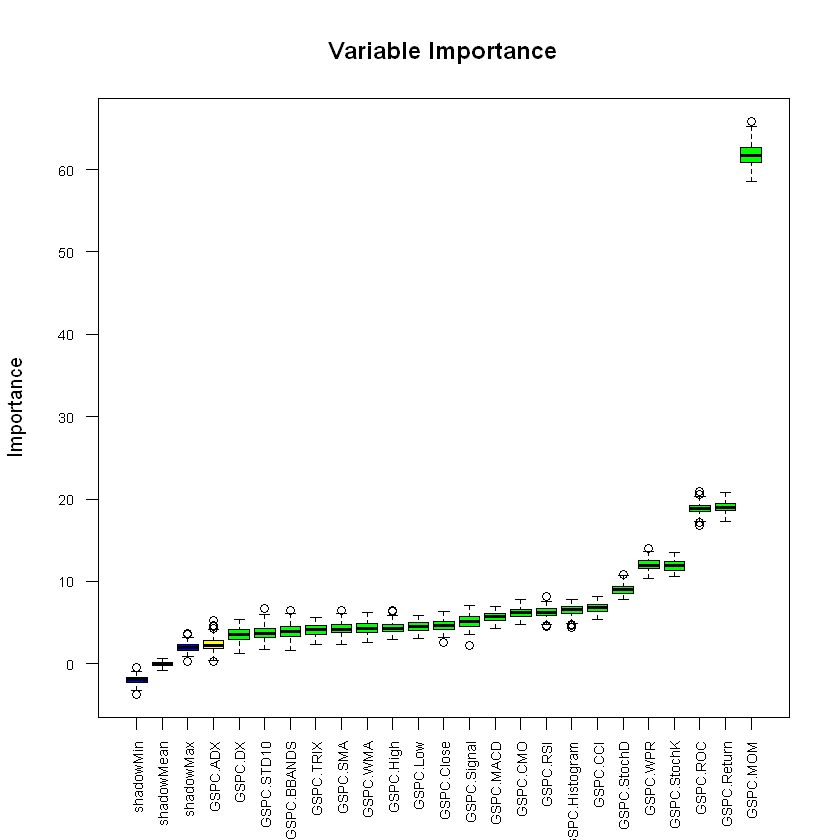

In [51]:
# Análise Gráfica
plot(GSPCboruta.zscore.output, cex.axis = .7, las = 2, xlab = "", main = "Variable Importance")

Variável `GSPC.ADX`: estado de atenção

**Dados minmax**

In [52]:
# Objeto de armazenamento dos resultados
set.seed(123)
GSPCboruta.minmax.output <- Boruta(Direction.df$GSPC.Trend ~., data = GSPC.minmax, doTrace = 0)
names(GSPCboruta.minmax.output)

[1] "finalDecision" "ImpHistory"    "pValue"        "maxRuns"      
 [5] "light"         "mcAdj"         "timeTaken"     "roughfixed"   
 [9] "call"          "impSource"

In [53]:
# Obtenção das variáveis de significância
GSPCboruta.minmax.signif <- getSelectedAttributes(GSPCboruta.minmax.output, withTentative = TRUE)
print(GSPCboruta.minmax.signif)

 [1] "GSPC.High"      "GSPC.Low"       "GSPC.Close"     "GSPC.Return"   
 [5] "GSPC.SMA"       "GSPC.WMA"       "GSPC.STD10"     "GSPC.MOM"      
 [9] "GSPC.ROC"       "GSPC.StochK"    "GSPC.StochD"    "GSPC.RSI"      
[13] "GSPC.WPR"       "GSPC.ADX"       "GSPC.DX"        "GSPC.CCI"      
[17] "GSPC.CMO"       "GSPC.TRIX"      "GSPC.MACD"      "GSPC.Signal"   
[21] "GSPC.Histogram" "GSPC.BBANDS"   


In [54]:
# Correção preliminar
GSPCboruta.minmax.roughfixmod <- TentativeRoughFix(GSPCboruta.minmax.output)
GSPCboruta.minmax.signif2 <- getSelectedAttributes(GSPCboruta.minmax.roughfixmod)
print(GSPCboruta.minmax.signif2)

 [1] "GSPC.High"      "GSPC.Low"       "GSPC.Close"     "GSPC.Return"   
 [5] "GSPC.SMA"       "GSPC.WMA"       "GSPC.STD10"     "GSPC.MOM"      
 [9] "GSPC.ROC"       "GSPC.StochK"    "GSPC.StochD"    "GSPC.RSI"      
[13] "GSPC.WPR"       "GSPC.ADX"       "GSPC.DX"        "GSPC.CCI"      
[17] "GSPC.CMO"       "GSPC.TRIX"      "GSPC.MACD"      "GSPC.Signal"   
[21] "GSPC.Histogram" "GSPC.BBANDS"   


In [55]:
# Score de importância das variáveis
GSPCboruta.minmax.imp <- attStats(GSPCboruta.minmax.roughfixmod)
GSPCboruta.minmax.imp2 <- GSPCboruta.zscore.imp[GSPCboruta.minmax.imp$decision != 'Rejected', c('meanImp', 'decision')]

# Exibição por ordem decrescente de importância
head(GSPCboruta.minmax.imp2[order(-GSPCboruta.minmax.imp2),])

Warning message in Ops.factor(left):
"'-' not meaningful for factors"

,meanImp,decision
GSPC.MOM,61.842241,Confirmed
GSPC.Return,19.008134,Confirmed
GSPC.ROC,18.853431,Confirmed
GSPC.WPR,11.969353,Confirmed
GSPC.StochK,11.950784,Confirmed
GSPC.StochD,9.098948,Confirmed


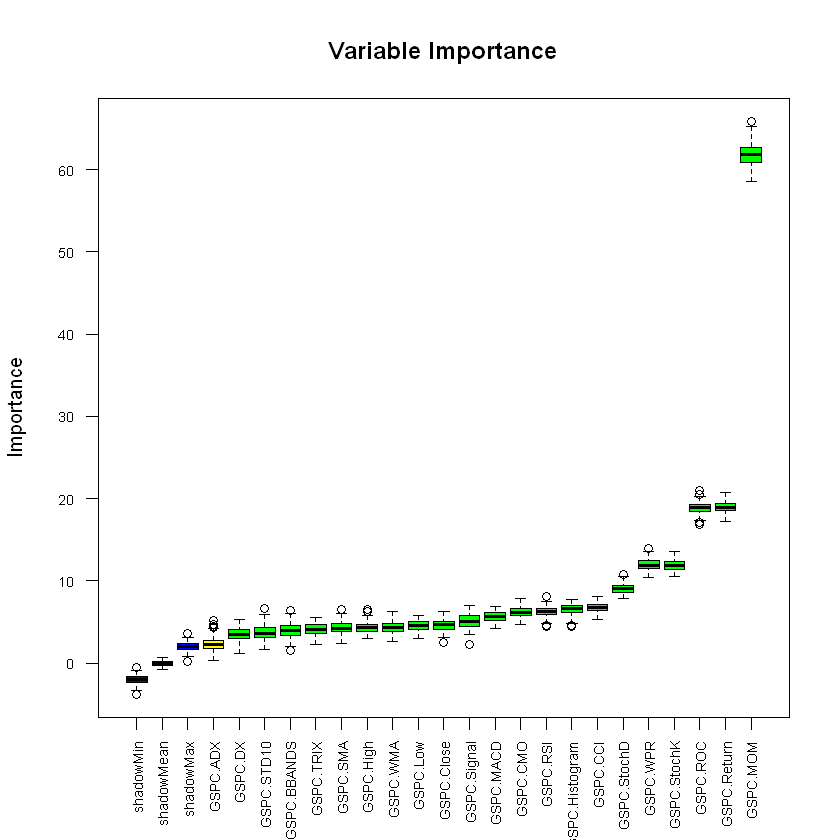

In [56]:
# Análise Gráfica
plot(GSPCboruta.minmax.output, cex.axis = .7, las = 2, xlab = "", main = "Variable Importance")

Todas as variáveis foram consideradas.

### 5.4.2. Classificação e seleção de atributos com base no algoritmo *Recursive Feature Elimination* (RFE)

In [57]:
# Package
library(caret)
library(e1071)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'e1071' was built under R version 3.6.3"

In [58]:
# Definição do controle por meio de uma função de seleção random forest
control <- rfeControl(functions = rfFuncs, method = "cv", number = 10)

**Dados z-score**

In [59]:
GSPCrfe.zscore.output <- rfe(Direction.df$GSPC.Trend~., GSPC.zscore, rfeControl = control)

In [60]:
# Resultado da seleção
print(GSPCrfe.zscore.output)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD  KappaSD Selected
         4   1.0000 1.0000  0.0000000 0.000000        *
         8   0.9994 0.9989  0.0009103 0.001827         
        16   0.9994 0.9989  0.0009103 0.001827         
        22   0.9994 0.9989  0.0009103 0.001827         

The top 4 variables (out of 4):
   GSPC.MOM, GSPC.ROC, GSPC.Return, GSPC.StochK



In [61]:
# Lista dos atributos escolhidos (de acordo com a variável de interesse)
predictors(GSPCrfe.zscore.output)

[1] "GSPC.MOM"    "GSPC.ROC"    "GSPC.Return" "GSPC.StochK"

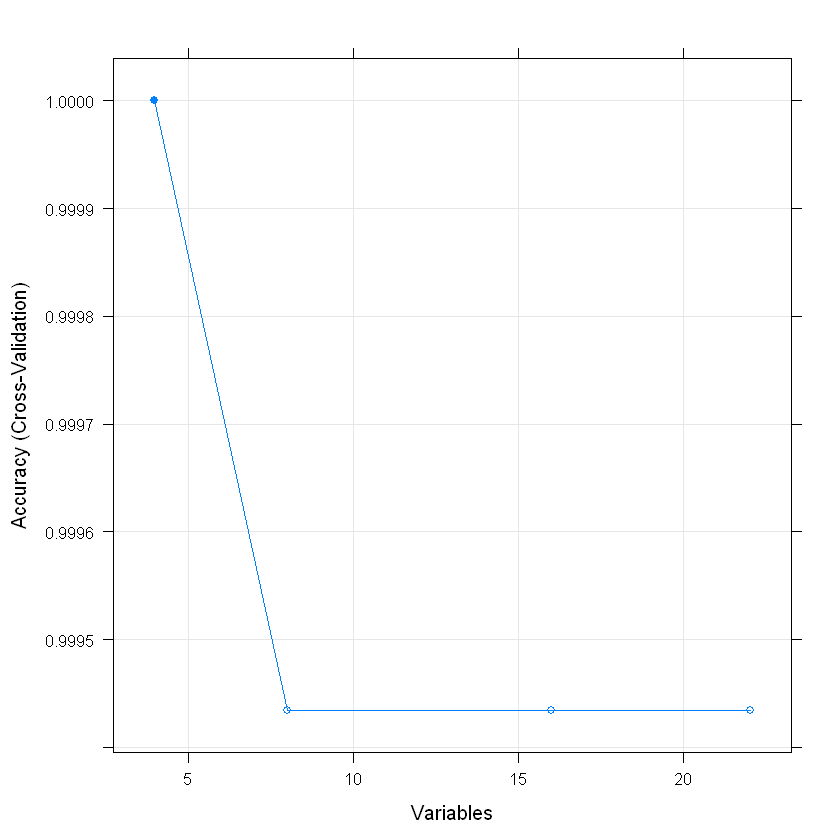

In [62]:
plot(GSPCrfe.zscore.output, type=c("g", "o"))

As *features* aprovadas foram: `GSPC.MOM`, `GSPC.ROC`, `GSPC.Return`, `GSPC.WPR`

**Dados minmax**

In [63]:
GSPCrfe.minmax.output <- rfe(Direction.df$GSPC.Trend~., GSPC.minmax, rfeControl = control)

In [64]:
# Resultado da seleção
print(GSPCrfe.minmax.output)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD  KappaSD Selected
         4   1.0000 1.0000   0.000000 0.000000        *
         8   0.9994 0.9989   0.000912 0.001831         
        16   0.9994 0.9989   0.000912 0.001831         
        22   0.9994 0.9989   0.000912 0.001831         

The top 4 variables (out of 4):
   GSPC.MOM, GSPC.ROC, GSPC.Return, GSPC.StochK



In [65]:
# Lista dos atributos escolhidos (de acordo com a variável de interesse)
predictors(GSPCrfe.minmax.output)

[1] "GSPC.MOM"    "GSPC.ROC"    "GSPC.Return" "GSPC.StochK"

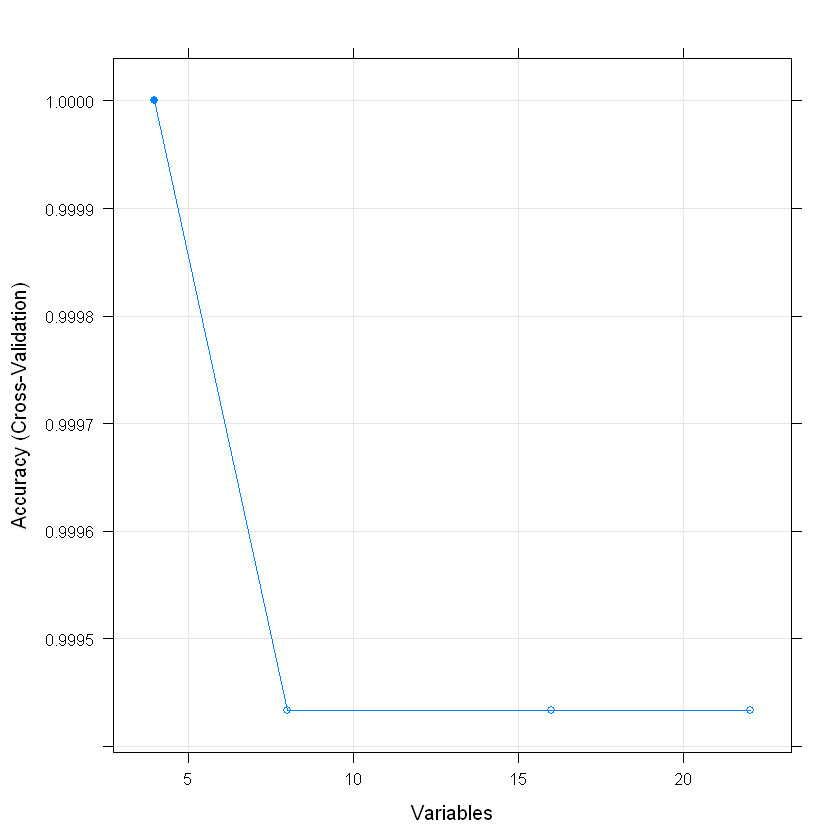

In [66]:
plot(GSPCrfe.minmax.output, type=c("g", "o"))

As *features* aprovadas foram: `GSPC.MOM`, `GSPC.ROC`, `GSPC.Return`, `GSPC.WPR`

### 5.4.3. Seleção de atributos utilizando Análise de Componentes Principais (PCA)

**Dados z-score**

In [67]:
# Magnitude completa (variância completa)
GSPC.zscore.pca <- prcomp(x = GSPC.zscore, center = TRUE, scale. = TRUE)
summary(GSPC.zscore.pca)

# PCA com maior proporção de variância: PCA1 (35.33%)

Importance of components:
                         PC1    PC2    PC3    PC4    PC5     PC6     PC7
Standard deviation     2.743 2.2804 1.8064 1.4988 1.2294 0.81326 0.66044
Proportion of Variance 0.342 0.2364 0.1483 0.1021 0.0687 0.03006 0.01983
Cumulative Proportion  0.342 0.5783 0.7267 0.8288 0.8975 0.92754 0.94737
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.58494 0.47125 0.42131 0.34622 0.34290 0.30468 0.20792
Proportion of Variance 0.01555 0.01009 0.00807 0.00545 0.00534 0.00422 0.00196
Cumulative Proportion  0.96292 0.97301 0.98108 0.98653 0.99187 0.99609 0.99806
                          PC15    PC16    PC17    PC18     PC19     PC20
Standard deviation     0.19096 0.07404 0.02460 0.01025 0.006906 0.003911
Proportion of Variance 0.00166 0.00025 0.00003 0.00000 0.000000 0.000000
Cumulative Proportion  0.99972 0.99996 0.99999 1.00000 1.000000 1.000000
                            PC21      PC22
Standard deviation     1.988e-1

A função `prcomp` fornece 4 outputs:

* Sdev: definição do desvio padrão dos pontos projetados sobre os PCAs (diminui do PCA1 até o PCA18)

* Rotation: definição dos eixos dos componentes principais. `Rotation` é a matriz *rotation*, que fornece os pesos utilizados para projetar os pontos originais para as 2 novas direções.

* Center: média das features de input no espaço de features originais (sem qualquer transformação).

* Scale: desvio padrão das features de input no espaço de features originais (sem qualquer transformação).

In [68]:
print('Sdev')
round(GSPC.zscore.pca$sdev, 4)

[1] "Sdev"


[1] 2.7429 2.2804 1.8064 1.4988 1.2294 0.8133 0.6604 0.5849 0.4712 0.4213
[11] 0.3462 0.3429 0.3047 0.2079 0.1910 0.0740 0.0246 0.0103 0.0069 0.0039
[21] 0.0000 0.0000

In [69]:
print('Rotation')
round(GSPC.zscore.pca$rotation, 4)

[1] "Rotation"


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
GSPC.High,0.1862,0.3709,-0.0281,-0.0349,-0.0576,0.1393,0.0044,-0.0157,0.0374,-0.0091,...,-0.0092,0.0074,-0.0005,0.0033,0.1841,-0.7563,-0.4415,-0.0143,0.0000,0.0000
GSPC.Low,0.1893,0.3679,-0.0317,-0.0367,-0.0593,0.1465,0.0024,-0.0170,0.0398,-0.0068,...,-0.0084,0.0085,-0.0118,-0.0105,0.5270,0.6106,-0.3766,0.0817,0.0000,0.0000
GSPC.Close,0.1891,0.3685,-0.0261,-0.0398,-0.0582,0.1432,0.0037,-0.0170,0.0382,-0.0070,...,-0.0033,0.0063,-0.0035,-0.0067,0.3393,-0.1303,0.8132,0.0834,0.0000,0.0000
GSPC.Return,0.1206,-0.0761,0.3765,-0.4082,0.0248,-0.0328,0.0365,-0.0686,0.0859,-0.0208,...,-0.0656,-0.0138,0.0043,-0.0033,0.0027,0.0019,-0.0008,0.0002,0.0007,0.7071
GSPC.SMA,0.1791,0.3755,-0.0321,-0.0410,-0.0525,0.1429,0.0028,-0.0258,0.0254,-0.0128,...,-0.0017,0.0110,0.0334,0.0149,-0.6294,0.1154,-0.0282,0.6226,0.0000,0.0000
GSPC.WMA,0.1820,0.3735,-0.0323,-0.0385,-0.0543,0.1421,0.0030,-0.0248,0.0337,-0.0104,...,0.0001,0.0063,0.0231,0.0022,-0.4180,0.1572,0.0333,-0.7736,0.0000,0.0000
GSPC.STD10,-0.0085,0.2714,0.2524,0.1779,0.0529,-0.5845,-0.2082,0.3038,0.1824,-0.4433,...,0.0067,0.0045,0.0089,0.0042,0.0021,0.0046,0.0007,0.0002,0.0000,0.0000
GSPC.MOM,0.1406,-0.0612,0.3514,-0.3943,0.0198,0.0063,-0.0027,-0.0088,0.0000,0.0471,...,0.0706,-0.1989,0.0419,0.0039,-0.0097,-0.0018,-0.0065,-0.0013,0.0000,0.0000
GSPC.ROC,0.1206,-0.0761,0.3765,-0.4082,0.0248,-0.0328,0.0365,-0.0686,0.0859,-0.0208,...,-0.0656,-0.0138,0.0043,-0.0033,0.0027,0.0019,-0.0008,0.0002,-0.0007,-0.7071
GSPC.StochK,0.3225,-0.1398,0.1155,0.0961,0.0062,0.0658,-0.0905,0.1134,-0.3002,-0.1782,...,0.3045,0.3066,-0.0249,-0.0023,-0.0010,-0.0005,-0.0012,-0.0014,-0.7071,0.0007


In [70]:
print('Center')
round(GSPC.zscore.pca$center, 4)

[1] "Center"


GSPC.High       GSPC.Low     GSPC.Close    GSPC.Return       GSPC.SMA 
             0              0              0              0              0 
      GSPC.WMA     GSPC.STD10       GSPC.MOM       GSPC.ROC    GSPC.StochK 
             0              0              0              0              0 
   GSPC.StochD       GSPC.RSI       GSPC.WPR       GSPC.ADX        GSPC.DX 
             0              0              0              0              0 
      GSPC.CCI       GSPC.CMO      GSPC.TRIX      GSPC.MACD    GSPC.Signal 
             0              0              0              0              0 
GSPC.Histogram    GSPC.BBANDS 
             0              0

In [71]:
print('Scale')
round(GSPC.zscore.pca$scale, 4)

[1] "Scale"


GSPC.High       GSPC.Low     GSPC.Close    GSPC.Return       GSPC.SMA 
             1              1              1              1              1 
      GSPC.WMA     GSPC.STD10       GSPC.MOM       GSPC.ROC    GSPC.StochK 
             1              1              1              1              1 
   GSPC.StochD       GSPC.RSI       GSPC.WPR       GSPC.ADX        GSPC.DX 
             1              1              1              1              1 
      GSPC.CCI       GSPC.CMO      GSPC.TRIX      GSPC.MACD    GSPC.Signal 
             1              1              1              1              1 
GSPC.Histogram    GSPC.BBANDS 
             1              1

In [72]:
# scores para as dimensões
head(round(GSPC.zscore.pca$x, 4))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
59,3.1233,-0.4968,0.5160,2.4330,2.2443,-3.2661,-0.1863,-0.8844,1.3269,0.0874,...,-0.0386,0.3842,-0.0247,-0.2230,0.0334,0.0044,-0.0004,-0.0028,0,0
60,2.2336,-0.0596,-0.9209,3.2000,1.9746,-3.4335,0.3362,-0.6651,1.1986,-0.1698,...,0.1267,0.4794,-0.2024,-0.1325,0.0022,0.0080,-0.0009,0.0003,0,0
61,2.6388,-0.6520,-0.1984,1.4079,1.8349,-2.7722,0.8411,-0.7831,1.1584,0.7209,...,0.2059,0.3070,-0.1031,-0.0414,-0.0273,0.0057,-0.0019,0.0032,0,0
62,1.2253,-0.0670,-2.0512,1.9680,1.2683,-2.8203,1.6126,-0.6621,0.1003,0.1914,...,0.1583,0.4377,-0.1021,-0.0171,-0.0230,-0.0087,0.0007,-0.0014,0,0
63,2.1487,-0.6041,0.1878,-0.8086,1.5671,-2.7154,1.6426,-0.9724,0.0006,0.4414,...,0.0407,0.1020,0.0682,0.0170,-0.0125,-0.0026,-0.0116,-0.0008,0,0
64,1.8268,-0.5663,-1.0649,-0.1968,1.6016,-2.2823,1.9044,-1.4341,-0.9240,0.3476,...,0.2509,0.1878,-0.0855,0.0016,-0.0076,0.0034,0.0058,0.0011,0,0


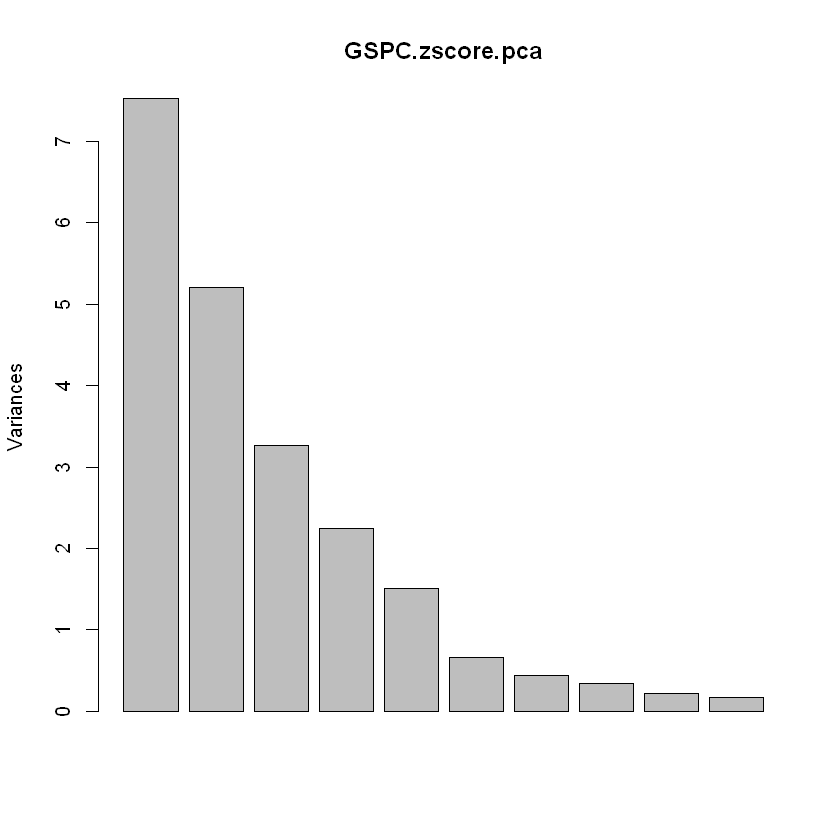

In [73]:
# gráfico da dominância dos PCAs
plot(GSPC.zscore.pca)

In [74]:
# Visualização dos dados na nova dimensão reduzida
GSPC.zscore.pcar <- princomp(GSPC.zscore)
loadings(GSPC.zscore.pcar)


Loadings:
               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
GSPC.High       0.186  0.371                       0.139                     
GSPC.Low        0.189  0.368                       0.147                     
GSPC.Close      0.189  0.368                       0.143                     
GSPC.Return     0.121        -0.376  0.408                                   
GSPC.SMA        0.179  0.376                       0.143                     
GSPC.WMA        0.182  0.374                       0.142                     
GSPC.STD10             0.271 -0.252 -0.178        -0.584 -0.208 -0.304  0.182
GSPC.MOM        0.141        -0.351  0.394                                   
GSPC.ROC        0.121        -0.376  0.408                                   
GSPC.StochK     0.323 -0.140 -0.116                             -0.113 -0.300
GSPC.StochD     0.315 -0.126        -0.234                             -0.133
GSPC.RSI        0.285 -0.128        -0.168           

In [75]:
# Valores das novas features para os primeiros 5 casos
GSPC.zscore.pcar$scores[1:5,]

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,...,Comp.13,Comp.14,Comp.15,Comp.16,Comp.17,Comp.18,Comp.19,Comp.20,Comp.21,Comp.22
59,3.123334,-0.49680375,-0.5160429,-2.432956,-2.244292,-3.266117,-0.1862696,0.8843650,1.3268752663,-0.08739034,...,0.03859434,0.3841985,0.02474007,-0.22296322,0.033363788,-0.004358970,0.0003901827,0.0027918363,8.772146e-15,-4.982218e-15
60,2.233579,-0.05961983,0.9209351,-3.200023,-1.974576,-3.433540,0.3361757,0.6650576,1.1985647301,0.16975904,...,-0.12667568,0.4794131,0.20243278,-0.13251544,0.002219884,-0.008046544,0.0008968774,-0.0003468275,2.953647e-15,1.052946e-14
61,2.638797,-0.65204651,0.1983649,-1.407857,-1.834875,-2.772238,0.8411137,0.7831171,1.1584066121,-0.72088885,...,-0.20593410,0.3070207,0.10312687,-0.04138058,-0.027309117,-0.005682744,0.0018658753,-0.0031537025,-4.706843e-15,2.191883e-14
62,1.225315,-0.06701717,2.0511791,-1.968048,-1.268317,-2.820292,1.6126076,0.6620528,0.1002764561,-0.19137003,...,-0.15829757,0.4376820,0.10212993,-0.01712849,-0.023027182,0.008689188,-0.0007041797,0.0014333910,-2.148314e-15,-1.309578e-14
63,2.148676,-0.60413781,-0.1878426,0.808600,-1.567059,-2.715407,1.6425513,0.9723955,0.0006117804,-0.44136054,...,-0.04066858,0.1020426,-0.06823351,0.01700418,-0.012498868,0.002600580,0.0115599009,0.0008223190,6.947225e-15,5.705126e-14


No PCA1 os atributos `GSPC.STD10`, `GSPC.ADX`, `GSPC.DX`, `GSPC.BBANDS` foram desconsiderados.

**Dados minmax**

In [76]:
# Magnitude completa (variância completa)
GSPC.minmax.pca <- prcomp(x = GSPC.minmax, center = TRUE, scale. = TRUE)
summary(GSPC.minmax.pca)

# PCA com maior proporção de variância: PCA1 (35.33%)

Importance of components:
                         PC1    PC2    PC3    PC4    PC5     PC6     PC7
Standard deviation     2.743 2.2804 1.8064 1.4988 1.2294 0.81326 0.66044
Proportion of Variance 0.342 0.2364 0.1483 0.1021 0.0687 0.03006 0.01983
Cumulative Proportion  0.342 0.5783 0.7267 0.8288 0.8975 0.92754 0.94737
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.58494 0.47125 0.42131 0.34622 0.34290 0.30468 0.20792
Proportion of Variance 0.01555 0.01009 0.00807 0.00545 0.00534 0.00422 0.00196
Cumulative Proportion  0.96292 0.97301 0.98108 0.98653 0.99187 0.99609 0.99806
                          PC15    PC16    PC17    PC18     PC19     PC20
Standard deviation     0.19096 0.07404 0.02460 0.01025 0.006906 0.003911
Proportion of Variance 0.00166 0.00025 0.00003 0.00000 0.000000 0.000000
Cumulative Proportion  0.99972 0.99996 0.99999 1.00000 1.000000 1.000000
                            PC21      PC22
Standard deviation     2.019e-1

In [77]:
print('Sdev')
round(GSPC.minmax.pca$sdev, 4)

[1] "Sdev"


[1] 2.7429 2.2804 1.8064 1.4988 1.2294 0.8133 0.6604 0.5849 0.4712 0.4213
[11] 0.3462 0.3429 0.3047 0.2079 0.1910 0.0740 0.0246 0.0103 0.0069 0.0039
[21] 0.0000 0.0000

In [78]:
print('Rotation')
round(GSPC.minmax.pca$rotation, 4)

[1] "Rotation"


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
GSPC.High,0.1862,0.3709,-0.0281,-0.0349,-0.0576,0.1393,0.0044,-0.0157,0.0374,-0.0091,...,0.0092,-0.0074,0.0005,-0.0033,-0.1841,-0.7563,-0.4415,-0.0143,0.0000,0.0000
GSPC.Low,0.1893,0.3679,-0.0317,-0.0367,-0.0593,0.1465,0.0024,-0.0170,0.0398,-0.0068,...,0.0084,-0.0085,0.0118,0.0105,-0.5270,0.6106,-0.3766,0.0817,0.0000,0.0000
GSPC.Close,0.1891,0.3685,-0.0261,-0.0398,-0.0582,0.1432,0.0037,-0.0170,0.0382,-0.0070,...,0.0033,-0.0063,0.0035,0.0067,-0.3393,-0.1303,0.8132,0.0834,0.0000,0.0000
GSPC.Return,0.1206,-0.0761,0.3765,-0.4082,0.0248,-0.0328,0.0365,-0.0686,0.0859,-0.0208,...,0.0656,0.0138,-0.0043,0.0033,-0.0027,0.0019,-0.0008,0.0002,0.1032,-0.6995
GSPC.SMA,0.1791,0.3755,-0.0321,-0.0410,-0.0525,0.1429,0.0028,-0.0258,0.0254,-0.0128,...,0.0017,-0.0110,-0.0334,-0.0149,0.6294,0.1154,-0.0282,0.6226,0.0000,0.0000
GSPC.WMA,0.1820,0.3735,-0.0323,-0.0385,-0.0543,0.1421,0.0030,-0.0248,0.0337,-0.0104,...,-0.0001,-0.0063,-0.0231,-0.0022,0.4180,0.1572,0.0333,-0.7736,0.0000,0.0000
GSPC.STD10,-0.0085,0.2714,0.2524,0.1779,0.0529,-0.5845,-0.2082,0.3038,0.1824,-0.4433,...,-0.0067,-0.0045,-0.0089,-0.0042,-0.0021,0.0046,0.0007,0.0002,0.0000,0.0000
GSPC.MOM,0.1406,-0.0612,0.3514,-0.3943,0.0198,0.0063,-0.0027,-0.0088,0.0000,0.0471,...,-0.0706,0.1989,-0.0419,-0.0039,0.0097,-0.0018,-0.0065,-0.0013,0.0000,0.0000
GSPC.ROC,0.1206,-0.0761,0.3765,-0.4082,0.0248,-0.0328,0.0365,-0.0686,0.0859,-0.0208,...,0.0656,0.0138,-0.0043,0.0033,-0.0027,0.0019,-0.0008,0.0002,-0.1032,0.6995
GSPC.StochK,0.3225,-0.1398,0.1155,0.0961,0.0062,0.0658,-0.0905,0.1134,-0.3002,-0.1782,...,-0.3045,-0.3066,0.0249,0.0023,0.0010,-0.0005,-0.0012,-0.0014,-0.6995,-0.1032


In [79]:
print('Center')
round(GSPC.minmax.pca$center, 4)

[1] "Center"


GSPC.High       GSPC.Low     GSPC.Close    GSPC.Return       GSPC.SMA 
        0.3562         0.3580         0.3582         0.3941         0.3514 
      GSPC.WMA     GSPC.STD10       GSPC.MOM       GSPC.ROC    GSPC.StochK 
        0.3528         0.3787         0.4984         0.3941         0.6107 
   GSPC.StochD       GSPC.RSI       GSPC.WPR       GSPC.ADX        GSPC.DX 
        0.6068         0.5502         0.3893         0.4191         0.3410 
      GSPC.CCI       GSPC.CMO      GSPC.TRIX      GSPC.MACD    GSPC.Signal 
        0.5629         0.5066         0.4889         0.4872         0.4840 
GSPC.Histogram    GSPC.BBANDS 
        0.5023         0.3798

In [80]:
print('Scale')
round(GSPC.minmax.pca$scale, 4)

[1] "Scale"


GSPC.High       GSPC.Low     GSPC.Close    GSPC.Return       GSPC.SMA 
        0.2520         0.2497         0.2505         0.2321         0.2532 
      GSPC.WMA     GSPC.STD10       GSPC.MOM       GSPC.ROC    GSPC.StochK 
        0.2525         0.2622         0.2277         0.2321         0.3145 
   GSPC.StochD       GSPC.RSI       GSPC.WPR       GSPC.ADX        GSPC.DX 
        0.2937         0.2254         0.3145         0.2219         0.2313 
      GSPC.CCI       GSPC.CMO      GSPC.TRIX      GSPC.MACD    GSPC.Signal 
        0.1801         0.1747         0.1985         0.2025         0.2033 
GSPC.Histogram    GSPC.BBANDS 
        0.2081         0.2618

In [81]:
# scores para as dimensões
head(round(GSPC.minmax.pca$x, 4))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
59,3.1233,-0.4968,0.5160,2.4330,2.2443,-3.2661,-0.1863,-0.8844,1.3269,0.0874,...,0.0386,-0.3842,0.0247,0.2230,-0.0334,0.0044,-0.0004,-0.0028,0,0
60,2.2336,-0.0596,-0.9209,3.2000,1.9746,-3.4335,0.3362,-0.6651,1.1986,-0.1698,...,-0.1267,-0.4794,0.2024,0.1325,-0.0022,0.0080,-0.0009,0.0003,0,0
61,2.6388,-0.6520,-0.1984,1.4079,1.8349,-2.7722,0.8411,-0.7831,1.1584,0.7209,...,-0.2059,-0.3070,0.1031,0.0414,0.0273,0.0057,-0.0019,0.0032,0,0
62,1.2253,-0.0670,-2.0512,1.9680,1.2683,-2.8203,1.6126,-0.6621,0.1003,0.1914,...,-0.1583,-0.4377,0.1021,0.0171,0.0230,-0.0087,0.0007,-0.0014,0,0
63,2.1487,-0.6041,0.1878,-0.8086,1.5671,-2.7154,1.6426,-0.9724,0.0006,0.4414,...,-0.0407,-0.1020,-0.0682,-0.0170,0.0125,-0.0026,-0.0116,-0.0008,0,0
64,1.8268,-0.5663,-1.0649,-0.1968,1.6016,-2.2823,1.9044,-1.4341,-0.9240,0.3476,...,-0.2509,-0.1878,0.0855,-0.0016,0.0076,0.0034,0.0058,0.0011,0,0


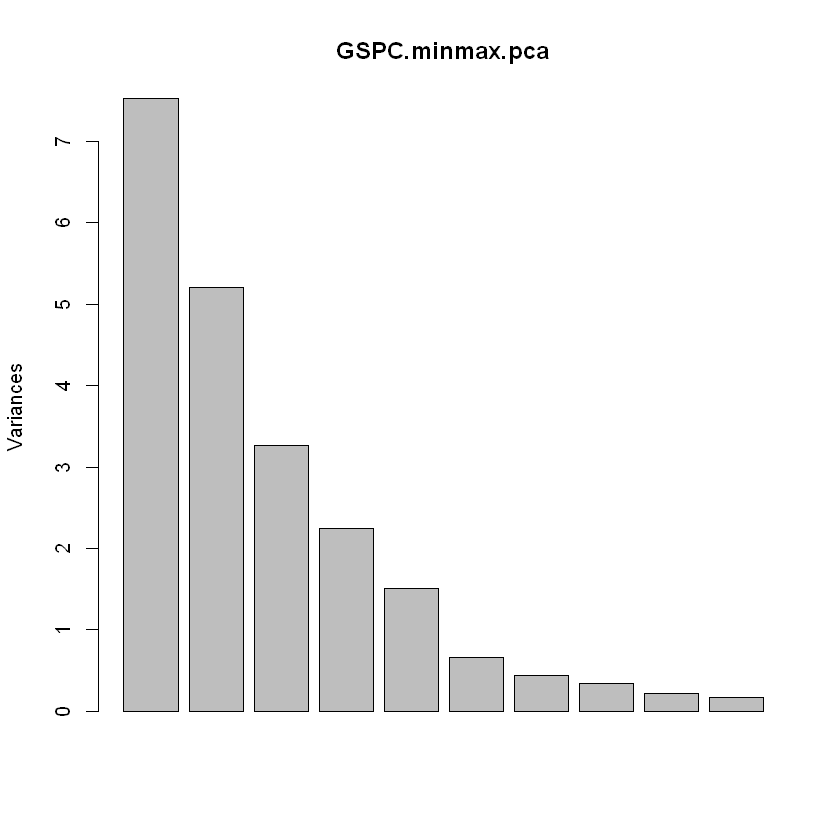

In [82]:
# gráfico da dominância dos PCAs
plot(GSPC.minmax.pca)

In [83]:
# Visualização dos dados na nova dimensão reduzida
GSPC.minmax.pcar <- princomp(GSPC.minmax)
loadings(GSPC.minmax.pcar)


Loadings:
               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
GSPC.High       0.196  0.363                       0.135                     
GSPC.Low        0.197  0.357                       0.139                     
GSPC.Close      0.197  0.359                       0.137                     
GSPC.Return     0.119        -0.391  0.392                              0.106
GSPC.SMA        0.189  0.370                       0.139                     
GSPC.WMA        0.192  0.367                       0.137                     
GSPC.STD10             0.282 -0.311 -0.259        -0.530 -0.303 -0.426  0.161
GSPC.MOM        0.135        -0.354  0.375                                   
GSPC.ROC        0.119        -0.391  0.392                              0.106
GSPC.StochK     0.418 -0.194                                           -0.356
GSPC.StochD     0.374 -0.163  0.103 -0.254                                   
GSPC.RSI        0.262 -0.126        -0.139           

In [84]:
# Valores das novas features para os primeiros 5 casos
GSPC.minmax.pcar$scores[1:5,]

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,...,Comp.13,Comp.14,Comp.15,Comp.16,Comp.17,Comp.18,Comp.19,Comp.20,Comp.21,Comp.22
59,0.6781126,-0.06592843,-0.22365685,-0.68790256,-0.4180933,-0.7522309,-0.04029086,0.1760285,0.322453489,0.030503897,...,-0.088358322,0.06835247,-0.0128875512,-0.045257897,0.0083189337,-0.0011016999,0.0001034916,7.040633e-04,-9.570938e-14,-3.249539e-15
60,0.4488876,0.04664206,0.09443390,-0.85741687,-0.3518265,-0.7928969,0.06735166,0.1173959,0.261499571,0.088010563,...,-0.114123824,0.07498238,0.0181939869,-0.026825236,0.0004904878,-0.0020171355,0.0002346130,-8.829064e-05,1.172094e-14,8.419674e-16
61,0.5315169,-0.10720106,-0.05578113,-0.42278101,-0.3627499,-0.6466577,0.23259299,0.2172950,0.253855197,-0.114983028,...,-0.062623060,0.02583747,0.0031295221,-0.008297259,-0.0069033458,-0.0014122538,0.0004747648,-7.966131e-04,1.085752e-13,4.305482e-15
62,0.1927500,0.03151163,0.35198857,-0.54500112,-0.2360525,-0.6675658,0.39742440,0.1789786,-0.008256831,0.002291325,...,-0.077639464,0.06644485,-0.0004725702,-0.003306594,-0.0057809170,0.0021878284,-0.0001868747,3.628003e-04,-5.029797e-14,-3.964192e-15
63,0.4095803,-0.10183535,-0.18381308,0.06790173,-0.3361007,-0.6577688,0.41919045,0.2569163,0.005560664,-0.043119398,...,-0.004140802,0.01066163,-0.0209759281,0.003526437,-0.0031273686,0.0006860702,0.0028940874,2.088881e-04,-1.762248e-14,1.270428e-16


No PCA1 os atributos `GSPC.STD10`, `GSPC.ADX`, `GSPC.DX`, `GSPC.TRIX`, `GSPC.BBANDS` foram desconsiderados.

# 6. Separação dos dados de treino e de teste

In [85]:
# Biblioteca(s) Necessária(s)
library(keras)

Warning message:
"package 'keras' was built under R version 3.6.3"

## 6.1. Amostra pós seleção de atributos

**Dados z-score**

In [86]:
# Nova amostra a partir da seleção de atributos (considerando todos os atributos que foram desconsiderados)
GSPC.zscore2 <- GSPC.zscore[, !(names(GSPC.zscore) %in% c('GSPC.STD10', 'GSPC.ADX', 'GSPC.DX', 'GSPC.BBANDS'))]
head(GSPC.zscore2)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram
59,-0.2188064,-0.2148310,-0.2214329,-0.08217814,-0.2962630,-0.2588267,-0.2995173612,-0.08217814,0.7925277,0.9951312,1.4203055,-0.7925277,0.9920454,1.6343688,0.2885589,2.254065,1.252625,2.3917426
60,-0.2291535,-0.2311024,-0.2444458,-1.15944405,-0.2749835,-0.2491301,-1.1516333628,-1.15944405,0.5063618,0.7887488,0.7521964,-0.5063618,0.7264373,1.2944433,0.5425899,2.274638,1.482723,2.3917426
61,-0.2375650,-0.2448980,-0.2433186,-0.08217814,-0.2583151,-0.2430805,-0.0009707333,-0.08217814,0.5063618,0.6511605,1.0370079,-0.5063618,0.5764631,1.0766638,0.7119440,2.264352,1.668993,2.2131579
62,-0.2433576,-0.2775553,-0.2727089,-1.15944405,-0.2541050,-0.2454117,-1.4556204759,-1.15944405,0.1883997,0.4447782,-0.3994710,-0.1883997,0.3399476,0.8345814,0.8812980,2.110052,1.789521,1.3689395
63,-0.2398990,-0.2636022,-0.2575003,0.99508777,-0.2492076,-0.2457406,0.6702491339,0.99508777,0.3473808,0.3759840,-0.2810214,-0.3473808,0.3668307,1.1060167,0.9659750,2.017473,1.855263,0.8818905
64,-0.2578607,-0.2599101,-0.2469568,-0.08217814,-0.2421479,-0.2450398,0.4478692995,-0.08217814,0.4745656,0.3759840,-1.0227733,-0.4745656,0.3100265,1.6176408,1.1353290,1.966039,1.910048,0.5571911


In [87]:
GSPC.zscore3 <- as.data.frame(cbind(GSPC.zscore2, Direction.df))
head(GSPC.zscore3)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
59,-0.2188064,-0.2148310,-0.2214329,-0.08217814,-0.2962630,-0.2588267,-0.2995173612,-0.08217814,0.7925277,0.9951312,1.4203055,-0.7925277,0.9920454,1.6343688,0.2885589,2.254065,1.252625,2.3917426,0,down
60,-0.2291535,-0.2311024,-0.2444458,-1.15944405,-0.2749835,-0.2491301,-1.1516333628,-1.15944405,0.5063618,0.7887488,0.7521964,-0.5063618,0.7264373,1.2944433,0.5425899,2.274638,1.482723,2.3917426,0,down
61,-0.2375650,-0.2448980,-0.2433186,-0.08217814,-0.2583151,-0.2430805,-0.0009707333,-0.08217814,0.5063618,0.6511605,1.0370079,-0.5063618,0.5764631,1.0766638,0.7119440,2.264352,1.668993,2.2131579,1,up
62,-0.2433576,-0.2775553,-0.2727089,-1.15944405,-0.2541050,-0.2454117,-1.4556204759,-1.15944405,0.1883997,0.4447782,-0.3994710,-0.1883997,0.3399476,0.8345814,0.8812980,2.110052,1.789521,1.3689395,0,down
63,-0.2398990,-0.2636022,-0.2575003,0.99508777,-0.2492076,-0.2457406,0.6702491339,0.99508777,0.3473808,0.3759840,-0.2810214,-0.3473808,0.3668307,1.1060167,0.9659750,2.017473,1.855263,0.8818905,1,up
64,-0.2578607,-0.2599101,-0.2469568,-0.08217814,-0.2421479,-0.2450398,0.4478692995,-0.08217814,0.4745656,0.3759840,-1.0227733,-0.4745656,0.3100265,1.6176408,1.1353290,1.966039,1.910048,0.5571911,1,up


**Dados minmax**

In [88]:
# Nova amostra a partir da seleção de atributos (considerando todos os atributos que foram desconsiderados
GSPC.minmax2 <- GSPC.minmax[, !(names(GSPC.minmax) %in% c('GSPC.STD10', 'GSPC.ADX', 'GSPC.DX', 'GSPC.TRIX', 'GSPC.BBANDS'))]
head(GSPC.minmax2)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.MACD,GSPC.Signal,GSPC.Histogram
59,0.3010505,0.3043239,0.3027750,0.375,0.2764395,0.2874437,0.4302330,0.375,0.86,0.8989899,0.8704,0.14,0.7415028,0.7921627,0.9437500,0.7385857,1.0000000
60,0.2984430,0.3002611,0.2970113,0.125,0.2818271,0.2898919,0.2362401,0.125,0.77,0.8383838,0.7198,0.23,0.6936729,0.7327727,0.9479167,0.7853563,1.0000000
61,0.2963232,0.2968165,0.2972936,0.375,0.2860473,0.2914193,0.4982002,0.375,0.77,0.7979798,0.7840,0.23,0.6666660,0.6947234,0.9458333,0.8232183,0.9628378
62,0.2948635,0.2886623,0.2899327,0.125,0.2871132,0.2908307,0.1670344,0.125,0.67,0.7373737,0.4602,0.33,0.6240750,0.6524281,0.9145833,0.8477171,0.7871622
63,0.2957351,0.2921463,0.2937418,0.625,0.2883532,0.2907476,0.6510102,0.625,0.72,0.7171717,0.4869,0.28,0.6289160,0.6998518,0.8958333,0.8610802,0.6858108
64,0.2912086,0.2930682,0.2963824,0.375,0.2901406,0.2909246,0.6003832,0.375,0.76,0.7171717,0.3197,0.24,0.6186868,0.7892400,0.8854167,0.8722160,0.6182432


In [89]:
GSPC.minmax3 <- as.data.frame(cbind(GSPC.minmax2, Direction.df))
head(GSPC.minmax3)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
59,0.3010505,0.3043239,0.3027750,0.375,0.2764395,0.2874437,0.4302330,0.375,0.86,0.8989899,0.8704,0.14,0.7415028,0.7921627,0.9437500,0.7385857,1.0000000,0,down
60,0.2984430,0.3002611,0.2970113,0.125,0.2818271,0.2898919,0.2362401,0.125,0.77,0.8383838,0.7198,0.23,0.6936729,0.7327727,0.9479167,0.7853563,1.0000000,0,down
61,0.2963232,0.2968165,0.2972936,0.375,0.2860473,0.2914193,0.4982002,0.375,0.77,0.7979798,0.7840,0.23,0.6666660,0.6947234,0.9458333,0.8232183,0.9628378,1,up
62,0.2948635,0.2886623,0.2899327,0.125,0.2871132,0.2908307,0.1670344,0.125,0.67,0.7373737,0.4602,0.33,0.6240750,0.6524281,0.9145833,0.8477171,0.7871622,0,down
63,0.2957351,0.2921463,0.2937418,0.625,0.2883532,0.2907476,0.6510102,0.625,0.72,0.7171717,0.4869,0.28,0.6289160,0.6998518,0.8958333,0.8610802,0.6858108,1,up
64,0.2912086,0.2930682,0.2963824,0.375,0.2901406,0.2909246,0.6003832,0.375,0.76,0.7171717,0.3197,0.24,0.6186868,0.7892400,0.8854167,0.8722160,0.6182432,1,up


## 6.2. Separação das amostras

**Dados z-score**

In [90]:
# Determinação das amostras
GSPC.zscore.split <- sample(2, nrow(GSPC.zscore3), replace = TRUE, prob = c(0.70, 0.30))

In [91]:
# Separação das amostras (índice 1 = treino e indice 2 = teste)
GSPC.zscore.train <- GSPC.zscore3[GSPC.zscore.split == 1,]
GSPC.zscore.test <- GSPC.zscore3[GSPC.zscore.split == 2,]

In [92]:
head(GSPC.zscore.train)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
59,-0.2188064,-0.2148310,-0.2214329,-0.08217814,-0.2962630,-0.2588267,-0.2995174,-0.08217814,0.79252771,0.99513115,1.4203055,-0.79252771,0.99204541,1.6343688,0.2885589,2.254065,1.252625,2.3917426,0,down
60,-0.2291535,-0.2311024,-0.2444458,-1.15944405,-0.2749835,-0.2491301,-1.1516334,-1.15944405,0.50636183,0.78874878,0.7521964,-0.50636183,0.72643733,1.2944433,0.5425899,2.274638,1.482723,2.3917426,0,down
63,-0.2398990,-0.2636022,-0.2575003,0.99508777,-0.2492076,-0.2457406,0.6702491,0.99508777,0.34738079,0.37598404,-0.2810214,-0.34738079,0.36683068,1.1060167,0.9659750,2.017473,1.855263,0.8818905,1,up
64,-0.2578607,-0.2599101,-0.2469568,-0.08217814,-0.2421479,-0.2450398,0.4478693,-0.08217814,0.47456562,0.37598404,-1.0227733,-0.47456562,0.31002646,1.6176408,1.1353290,1.966039,1.910048,0.5571911,1,up
65,-0.2304487,-0.3608729,-0.2629931,-1.15944405,-0.2420190,-0.2485294,-0.8190837,-1.15944405,0.09301112,0.34158698,-1.2539053,-0.09301112,0.03198957,1.1741912,1.2200060,1.842600,1.921005,0.1350819,0,down
67,-0.2513563,-0.2593233,-0.2535625,0.99508777,-0.2476467,-0.2554229,0.8953492,0.99508777,0.02941870,-0.07117776,-0.4198781,-0.02941870,0.22026289,0.3949192,1.3893600,1.606007,1.855263,-0.4169070,1,up


In [93]:
head(GSPC.zscore.test)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
61,-0.2375650,-0.2448980,-0.2433186,-0.08217814,-0.2583151,-0.2430805,-0.0009707333,-0.08217814,0.5063618,0.6511605,1.037008,-0.5063618,0.57646313,1.0766638,0.711944,2.2643518,1.668993,2.2131579,1,up
62,-0.2433576,-0.2775553,-0.2727089,-1.15944405,-0.2541050,-0.2454117,-1.4556204759,-1.15944405,0.1883997,0.4447782,-0.399471,-0.1883997,0.33994764,0.8345814,0.881298,2.1100522,1.789521,1.3689395,0,down
66,-0.2587714,-0.2726609,-0.2734937,-0.08217814,-0.2439236,-0.2539641,-0.5552201677,-0.08217814,-0.2885434,0.1008076,-1.314239,0.2885434,0.12930248,0.2734046,1.304683,1.6780135,1.888134,-0.2870273,0,down
70,-0.2498761,-0.2601676,-0.2546326,-0.08217814,-0.2530454,-0.2521764,-0.3178789989,-0.08217814,0.0294187,0.1696017,-0.159910,-0.0294187,0.03972305,-0.2890347,1.474037,1.4208476,1.734735,-0.6441966,0,down
71,-0.2551707,-0.2896908,-0.3023132,-1.69807700,-0.2589595,-0.2608576,-2.1893209159,-1.69807700,-0.7654865,-0.2431631,-1.112387,0.7654865,-0.70038904,-1.5054438,1.474037,1.1328217,1.625165,-1.2286554,0,down
72,-0.3000887,-0.3280583,-0.3403494,-1.69807700,-0.2657471,-0.2754025,-1.8677372333,-1.69807700,-1.3060221,-0.7247219,-1.295163,1.3060221,-1.78197093,-1.7910822,1.474037,0.7419295,1.460809,-1.9754640,0,down


**Dados minmax**

In [94]:
# Determinação das amostras
GSPC.minmax.split <- sample(2, nrow(GSPC.minmax3), replace = TRUE, prob = c(0.70, 0.30))

In [95]:
# Separação das amostras (índice 1 = treino e indice 2 = teste)
GSPC.minmax.train <- GSPC.minmax3[GSPC.minmax.split == 1,]
GSPC.minmax.test <- GSPC.minmax3[GSPC.minmax.split == 2,]

In [96]:
head(GSPC.minmax.train)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
59,0.3010505,0.3043239,0.3027750,0.375,0.2764395,0.2874437,0.4302330,0.375,0.86,0.8989899,0.8704,0.14,0.7415028,0.7921627,0.9437500,0.7385857,1.0000000,0,down
60,0.2984430,0.3002611,0.2970113,0.125,0.2818271,0.2898919,0.2362401,0.125,0.77,0.8383838,0.7198,0.23,0.6936729,0.7327727,0.9479167,0.7853563,1.0000000,0,down
61,0.2963232,0.2968165,0.2972936,0.375,0.2860473,0.2914193,0.4982002,0.375,0.77,0.7979798,0.7840,0.23,0.6666660,0.6947234,0.9458333,0.8232183,0.9628378,1,up
62,0.2948635,0.2886623,0.2899327,0.125,0.2871132,0.2908307,0.1670344,0.125,0.67,0.7373737,0.4602,0.33,0.6240750,0.6524281,0.9145833,0.8477171,0.7871622,0,down
63,0.2957351,0.2921463,0.2937418,0.625,0.2883532,0.2907476,0.6510102,0.625,0.72,0.7171717,0.4869,0.28,0.6289160,0.6998518,0.8958333,0.8610802,0.6858108,1,up
65,0.2981166,0.2678588,0.2923661,0.125,0.2901732,0.2900435,0.3119484,0.125,0.64,0.7070707,0.2676,0.36,0.5686188,0.7117629,0.8604167,0.8744432,0.5304054,0,down


In [97]:
head(GSPC.minmax.test)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
64,0.2912086,0.2930682,0.2963824,0.375,0.2901406,0.2909246,0.6003832,0.375,0.76,0.7171717,0.3197,0.24,0.6186868,0.7892400,0.8854167,0.8722160,0.61824324,1,up
70,0.2932208,0.2930039,0.2944600,0.375,0.2873815,0.2891227,0.4260528,0.375,0.62,0.6565657,0.5142,0.38,0.5700114,0.4561158,0.7750000,0.8365813,0.36824324,0,down
71,0.2918865,0.2856322,0.2825181,0.000,0.2858842,0.2869309,0.0000000,0.000,0.37,0.5353535,0.2995,0.63,0.4367341,0.2435912,0.7166667,0.8143096,0.24662162,0,down
78,0.2651515,0.2645428,0.2691862,0.375,0.2655700,0.2628172,0.4135122,0.375,0.48,0.4848485,0.4158,0.52,0.3830685,0.3244322,0.3437500,0.4757795,0.06418919,0,down
79,0.2806208,0.2726649,0.2861878,1.000,0.2645911,0.2652473,1.0000000,1.000,0.74,0.5656566,0.5762,0.26,0.5023034,0.4293710,0.3895833,0.4557350,0.27364865,1,up
89,0.2636236,0.2626561,0.2628543,0.125,0.2649283,0.2630086,0.2997174,0.125,0.16,0.3636364,0.3294,0.84,0.4206361,0.3838773,0.3145833,0.3644209,0.30743243,0,down


# 7. Predição

## 7.1. Regressão Logística

## 7.1.1. Dados z-score

**Dados de treino**

In [98]:
train.zscore.model <- glm(GSPC.Direction ~., 
                          data = GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))],
                          family = binomial)
summary(train.zscore.model)

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = GSPC.Direction ~ ., family = binomial, data = GSPC.zscore.train[, 
    !(names(GSPC.zscore.train) %in% c("GSPC.Trend"))])

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-3.104e-03  -2.000e-08   2.000e-08   2.000e-08   3.002e-03  

Coefficients: (2 not defined because of singularities)
                 Estimate Std. Error z value Pr(>|z|)
(Intercept)       154.664   2146.919   0.072    0.943
GSPC.High        1146.092  58727.771   0.020    0.984
GSPC.Low         -935.675  53150.664  -0.018    0.986
GSPC.Close        208.279  45717.108   0.005    0.996
GSPC.Return     -1063.621   8858.422  -0.120    0.904
GSPC.SMA         3067.880 200468.128   0.015    0.988
GSPC.WMA        -3495.915 192417.912  -0.018    0.986
GSPC.MOM         3954.222  31711.363   0.125    0.901
GSPC.ROC               NA         NA      NA       NA
GSPC.StochK       -68.485   1631.118  -0.042    0.967
GSPC.StochD        39.918   1331.458   0.030    0.976
GSPC.RSI 

In [99]:
# Ajustamento dos valores no mesmo conjunto de dados utilizados para estimar o valor melhor ajustado.
train.zscore.pred <- predict(train.zscore.model, 
                             GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))])

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [100]:
# Conversão do output em uma forma probabilistica, que estará no intervalo [0,1]
train.zscore.prob <- 1 / (1 + exp(-(train.zscore.pred)))
head(train.zscore.prob) 

59 60 63 64 65 67 
 0  0  1  1  0  1

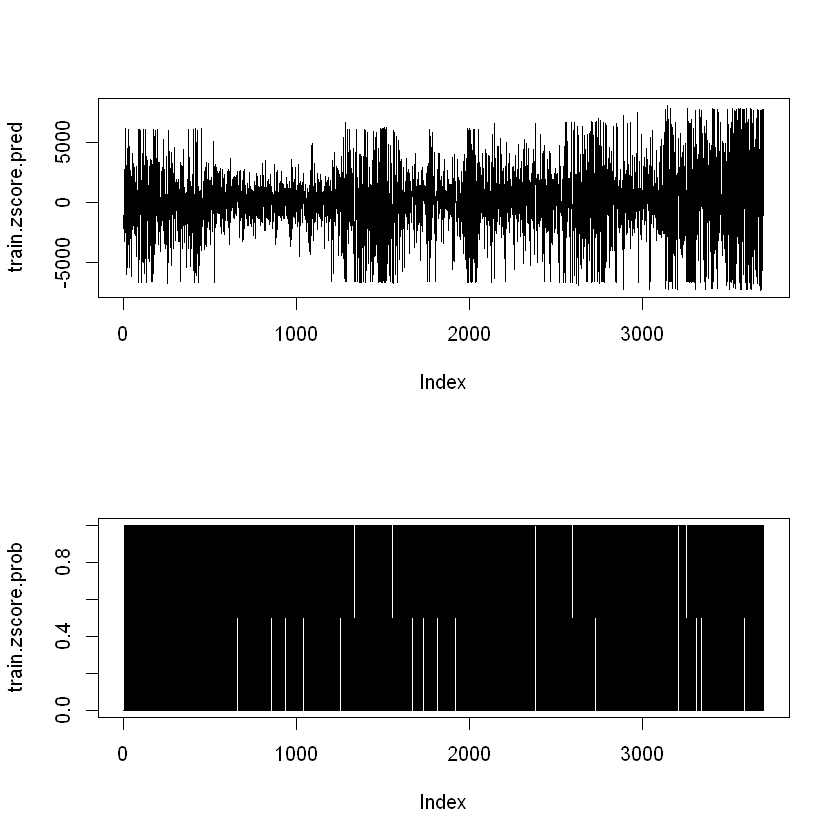

In [101]:
# Análise gráfica
par(mfrow = c(2,1))              

# Figura 1: previsão do modelo
plot(train.zscore.pred, type = "l")           

# Figura 2: probabilidade do modelo
plot(train.zscore.prob, type = "l")

In [102]:
# Classificação das probabilidades em 2 classes (1 = direção "Up" e 0 = direção "Down")
train.zscore.pred.direction <- NULL

# Direção para cima (Up)
train.zscore.pred.direction[train.zscore.prob > 0.5] <- 1    

# Direção para baixo (Down)
train.zscore.pred.direction[train.zscore.prob <= 0.5] <- 0

In [103]:
# Matriz de Confusão de treino
confusionMatrix(table(train.zscore.pred.direction,
                      GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))]$GSPC.Direction))

Confusion Matrix and Statistics

                           
train.zscore.pred.direction    0    1
                          0 1733    0
                          1    0 1969
                                    
               Accuracy : 1         
                 95% CI : (0.999, 1)
    No Information Rate : 0.5319    
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        
                                    
            Sensitivity : 1.0000    
            Specificity : 1.0000    
         Pos Pred Value : 1.0000    
         Neg Pred Value : 1.0000    
             Prevalence : 0.4681    
         Detection Rate : 0.4681    
   Detection Prevalence : 0.4681    
      Balanced Accuracy : 1.0000    
                                    
       'Positive' Class : 0         
                                    

In [104]:
# Packages
library(PRROC)

Warning message:
"package 'PRROC' was built under R version 3.6.3"

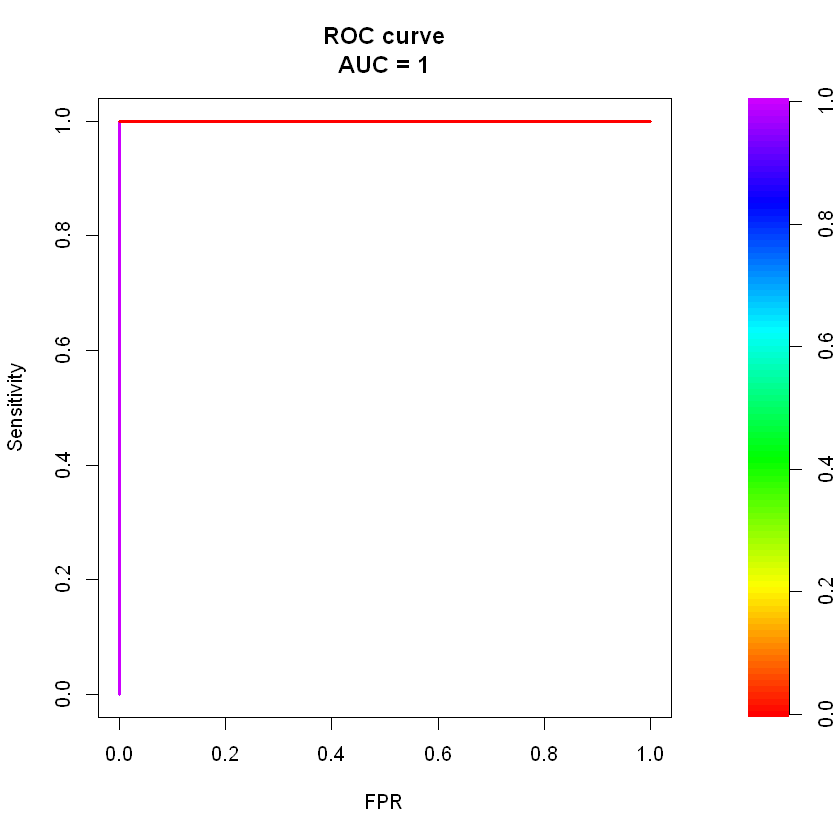

In [105]:
plot(roc.curve(scores.class0 = train.zscore.pred.direction, 
               weights.class0 = GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))]$GSPC.Direction, 
               curve=TRUE))

Sinais claros de *overfitting*

**Dados de teste**

In [106]:
# Ajustamento dos valores no mesmo conjunto de dados utilizados para estimar o valor melhor ajustado.
test.zscore.pred <- predict(train.zscore.model,
                            GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Trend'))])

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [107]:
# Conversão do output em uma forma probabilistica, que estará no intervalo [0,1]
test.zscore.prob <- 1 / (1 + exp(-(test.zscore.pred)))
head(test.zscore.prob) 

61 62 66 70 71 72 
 1  0  0  0  0  0

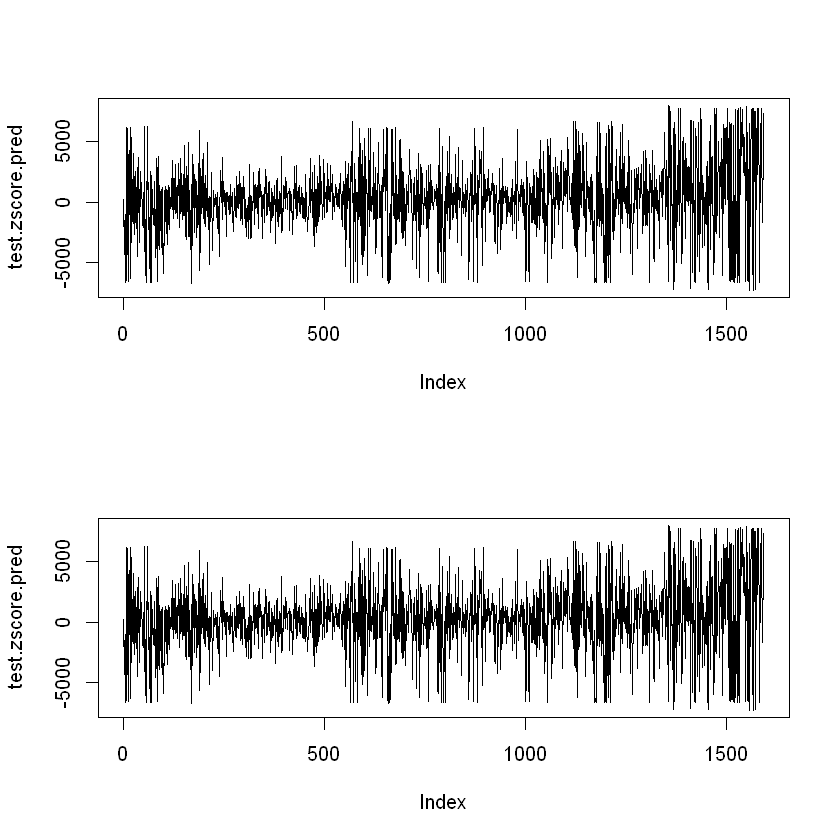

In [108]:
# Análise gráfica
par(mfrow = c(2,1))              

# Figura 1: previsão do modelo
plot(test.zscore.pred, type = "l")           

# Figura 2: probabilidade do modelo
plot(test.zscore.pred, type = "l")

In [109]:
# Classificação das probabilidades em 2 classes (1 = direção "Up" e 0 = direção "Down")
test.zscore.pred.direction <- NULL

# Direção para cima (Up)
test.zscore.pred.direction[test.zscore.prob > 0.5] <- 1    

# Direção para baixo (Down)
test.zscore.pred.direction[test.zscore.prob <= 0.5] <- 0

In [110]:
# Matriz de Confusão de treino
confusionMatrix(table(test.zscore.pred.direction,
                      GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Trend'))]$GSPC.Direction))

Confusion Matrix and Statistics

                          
test.zscore.pred.direction   0   1
                         0 709   0
                         1   5 880
                                         
               Accuracy : 0.9969         
                 95% CI : (0.9927, 0.999)
    No Information Rate : 0.5521         
    P-Value [Acc > NIR] : < 2e-16        
                                         
                  Kappa : 0.9937         
                                         
 Mcnemar's Test P-Value : 0.07364        
                                         
            Sensitivity : 0.9930         
            Specificity : 1.0000         
         Pos Pred Value : 1.0000         
         Neg Pred Value : 0.9944         
             Prevalence : 0.4479         
         Detection Rate : 0.4448         
   Detection Prevalence : 0.4448         
      Balanced Accuracy : 0.9965         
                                         
       'Positive' Class : 0          

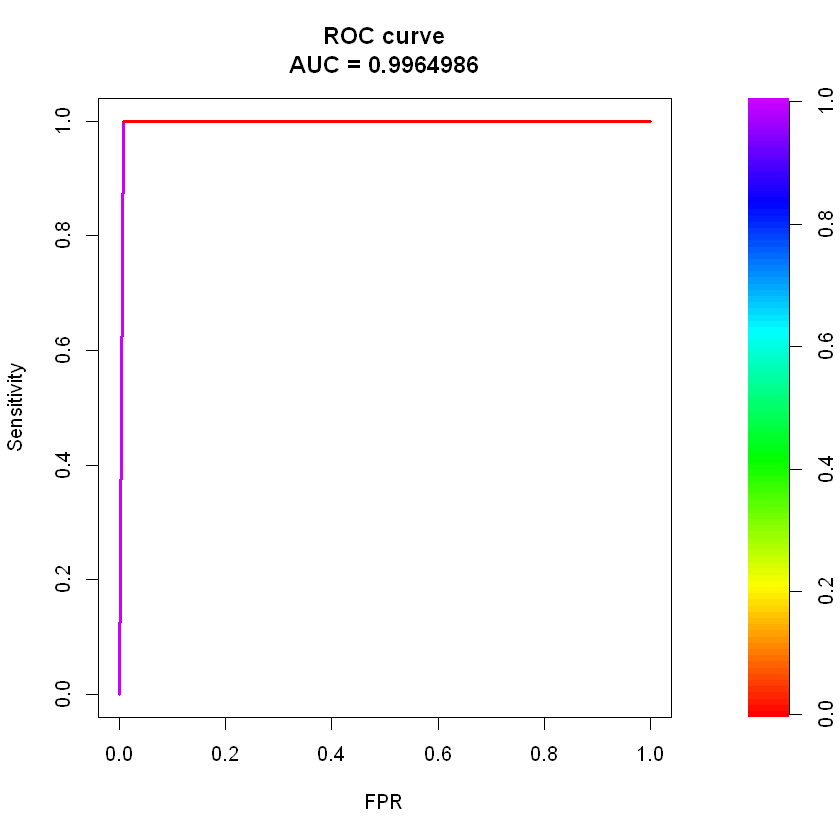

In [111]:
plot(roc.curve(scores.class0 = test.zscore.pred.direction, 
               weights.class0 = GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Trend'))]$GSPC.Direction, 
               curve=TRUE))

Apesar de o % de acurácia para os dados de teste ser menor, ainda há sinais de *overfitting*

## 7.1.2 Dados minmax

**Dados de treino**

In [112]:
train.minmax.model <- glm(GSPC.Direction ~.,
                          data = GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))],
                          family = binomial)
summary(train.minmax.model)

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = GSPC.Direction ~ ., family = binomial, data = GSPC.minmax.train[, 
    !(names(GSPC.minmax.train) %in% c("GSPC.Trend"))])

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.008392   0.000000   0.000000   0.000000   0.009026  

Coefficients: (2 not defined because of singularities)
                Estimate Std. Error z value Pr(>|z|)
(Intercept)    -15309.28   69093.13  -0.222    0.825
GSPC.High        8909.02  151820.48   0.059    0.953
GSPC.Low       -10377.94  146151.07  -0.071    0.943
GSPC.Close        310.29  349430.22   0.001    0.999
GSPC.Return    -11249.09   50938.19  -0.221    0.825
GSPC.SMA       -15835.25  227483.56  -0.070    0.945
GSPC.WMA        16919.88  189993.46   0.089    0.929
GSPC.MOM        40497.41  180708.16   0.224    0.823
GSPC.ROC              NA         NA      NA       NA
GSPC.StochK       248.39    3237.63   0.077    0.939
GSPC.StochD      -204.46    3453.46  -0.059    0.953
GSPC.RSI           32.88    226

In [113]:
# Ajustamento dos valores no mesmo conjunto de dados utilizados para estimar o valor melhor ajustado.
train.minmax.pred <- predict(train.minmax.model, GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))])

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [114]:
# Conversão do output em uma forma probabilistica, que estará no intervalo [0,1]
train.minmax.prob <- 1 / (1 + exp(-(train.minmax.pred)))
head(train.minmax.prob) 

59 60 61 62 63 65 
 0  0  1  0  1  0

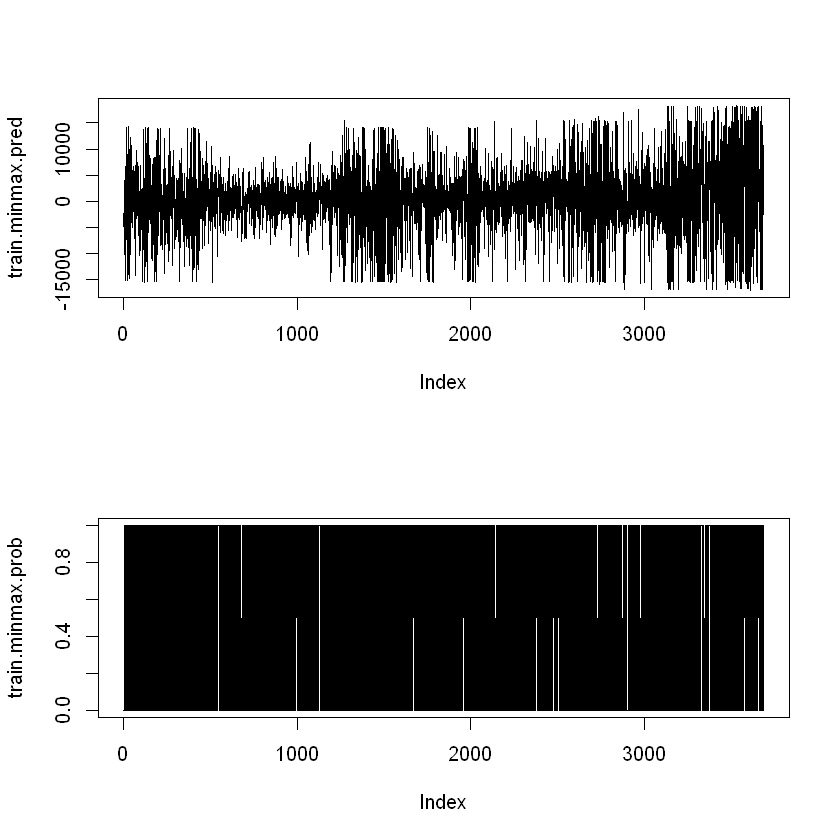

In [115]:
# Análise gráfica
par(mfrow = c(2,1))              

# Figura 1: previsão do modelo
plot(train.minmax.pred, type = "l")           

# Figura 2: probabilidade do modelo
plot(train.minmax.prob, type = "l")

In [116]:
# Classificação das probabilidades em 2 classes (1 = direção "Up" e 0 = direção "Down")
train.minmax.pred.direction <- NULL

# Direção para cima (Up)
train.minmax.pred.direction[train.minmax.prob > 0.5] <- 1    

# Direção para baixo (Down)
train.minmax.pred.direction[train.minmax.prob <= 0.5] <- 0

In [117]:
# Matriz de Confusão de treino
confusionMatrix(table(train.minmax.pred.direction,
                      GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))]$GSPC.Direction))

Confusion Matrix and Statistics

                           
train.minmax.pred.direction    0    1
                          0 1728    0
                          1    0 1963
                                    
               Accuracy : 1         
                 95% CI : (0.999, 1)
    No Information Rate : 0.5318    
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        
                                    
            Sensitivity : 1.0000    
            Specificity : 1.0000    
         Pos Pred Value : 1.0000    
         Neg Pred Value : 1.0000    
             Prevalence : 0.4682    
         Detection Rate : 0.4682    
   Detection Prevalence : 0.4682    
      Balanced Accuracy : 1.0000    
                                    
       'Positive' Class : 0         
                                    

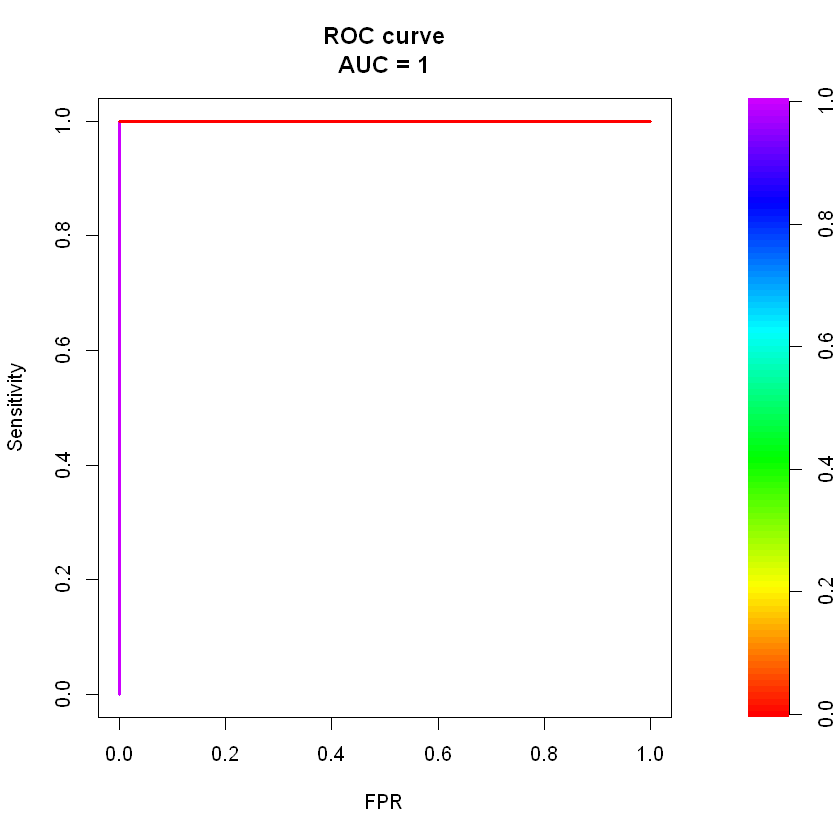

In [118]:
plot(roc.curve(scores.class0 = train.minmax.pred.direction, 
               weights.class0 = GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))]$GSPC.Direction, 
               curve=TRUE))

**Dados de teste**

In [119]:
# Ajustamento dos valores no mesmo conjunto de dados utilizados para estimar o valor melhor ajustado.
test.minmax.pred <- predict(train.minmax.model, GSPC.minmax.test[, !(names(GSPC.minmax.test) %in% c('GSPC.Trend'))])

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [120]:
# Conversão do output em uma forma probabilistica, que estará no intervalo [0,1]
test.minmax.prob <- 1 / (1 + exp(-(test.minmax.pred)))
head(test.minmax.prob) 

64 70 71 78 79 89 
 1  0  0  0  1  0

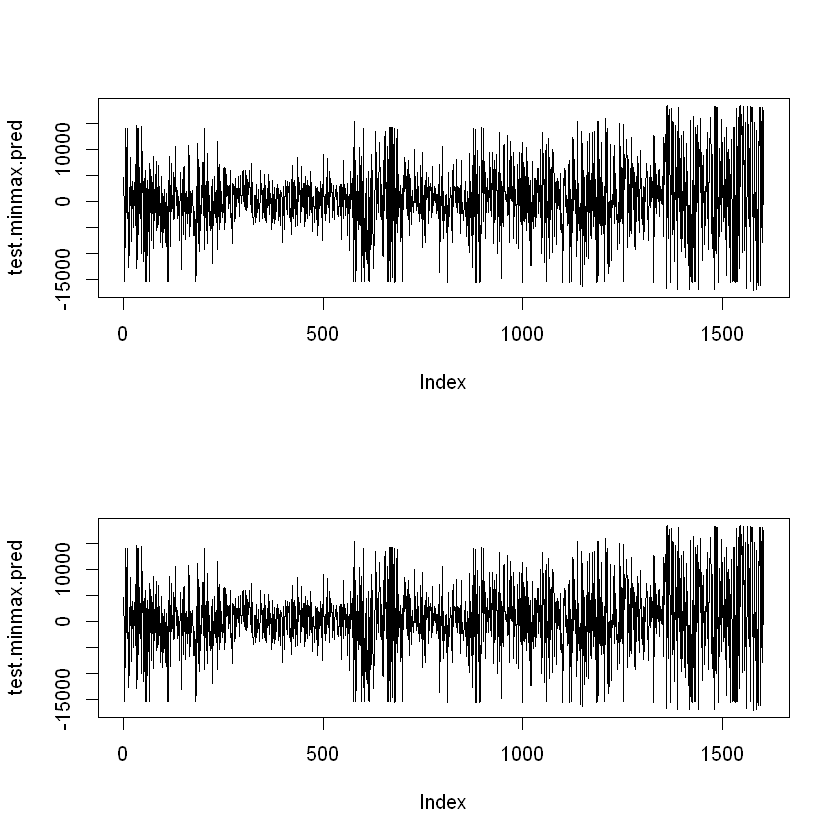

In [121]:
# Análise gráfica
par(mfrow = c(2,1))              

# Figura 1: previsão do modelo
plot(test.minmax.pred, type = "l")           

# Figura 2: probabilidade do modelo
plot(test.minmax.pred, type = "l")

In [122]:
# Classificação das probabilidades em 2 classes (1 = direção "Up" e 0 = direção "Down")
test.minmax.pred.direction <- NULL

# Direção para cima (Up)
test.minmax.pred.direction[test.minmax.prob > 0.5] <- 1    

# Direção para baixo (Down)
test.minmax.pred.direction[test.minmax.prob <= 0.5] <- 0

In [123]:
# Matriz de Confusão de treino
confusionMatrix(table(test.minmax.pred.direction,
                      GSPC.minmax.test[, !(names(GSPC.minmax.test) %in% c('GSPC.Trend'))]$GSPC.Direction))

Confusion Matrix and Statistics

                          
test.minmax.pred.direction   0   1
                         0 716   3
                         1   3 883
                                          
               Accuracy : 0.9963          
                 95% CI : (0.9919, 0.9986)
    No Information Rate : 0.552           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9924          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9958          
            Specificity : 0.9966          
         Pos Pred Value : 0.9958          
         Neg Pred Value : 0.9966          
             Prevalence : 0.4480          
         Detection Rate : 0.4461          
   Detection Prevalence : 0.4480          
      Balanced Accuracy : 0.9962          
                                          
       'Positive' 

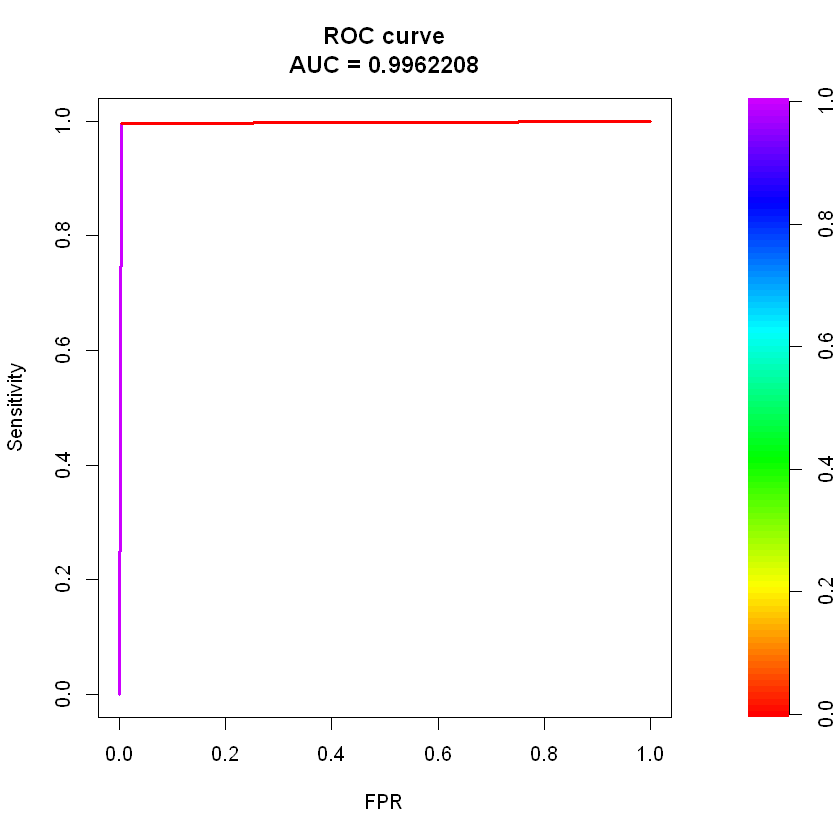

In [124]:
plot(roc.curve(scores.class0 = test.minmax.pred.direction, 
               weights.class0 = GSPC.minmax.test[, !(names(GSPC.minmax.test) %in% c('GSPC.Trend'))]$GSPC.Direction,
               curve=TRUE))

Apesar de o % de acurácia para os dados de teste ser menor, ainda há sinais de *overfitting*

## 7.2. Árvore de Decisão

In [125]:
# Packages
library(rpart) 
library(rpart.plot)

Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

### 7.2.1. Dados z-score

**Dados de treino**

In [126]:
# Criação da árvore de decisão
train.zscore.model.dt <- rpart(GSPC.Direction ~.,
                               GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))],
                               method = "class")

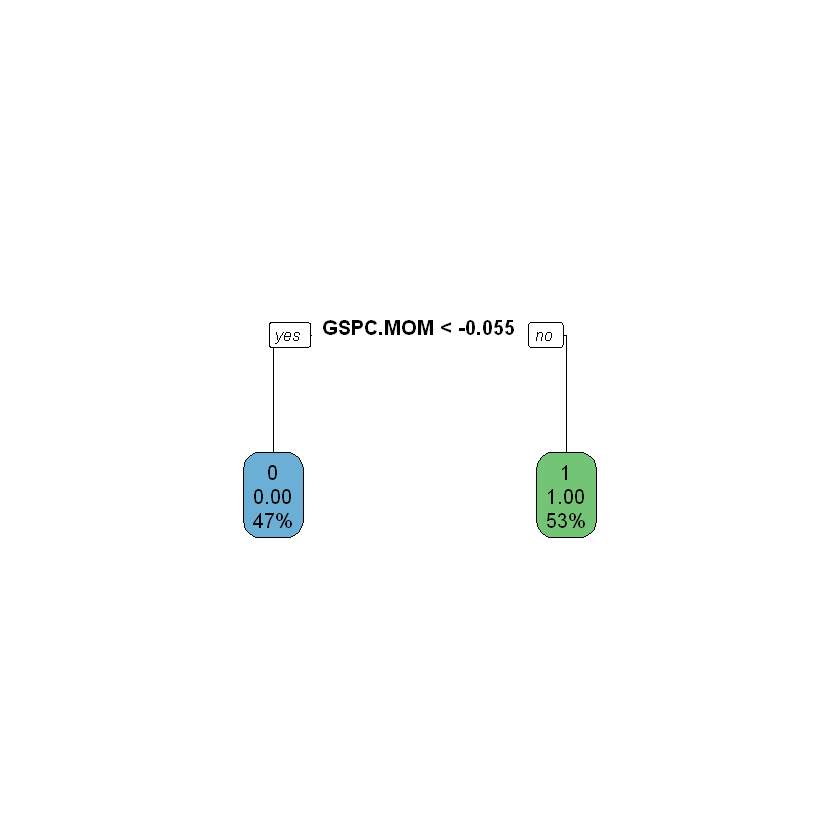

In [127]:
# Criação da árvore gráfica
rpart.plot(train.zscore.model.dt, type = 0, extra = 106, tweak = 1) 

In [128]:
# Importância dos atributos
train.zscore.imp <- varImp(train.zscore.model.dt, scale = F)
train.zscore.imp

,Overall
GSPC.MOM,1843.4776
GSPC.Return,682.6703
GSPC.ROC,682.6703
GSPC.StochK,237.2923
GSPC.WPR,237.2923
GSPC.High,0.0000
GSPC.Low,0.0000
GSPC.Close,0.0000
GSPC.SMA,0.0000
GSPC.WMA,0.0000


In [129]:
# Previsão
train.zscore.dt.pred <- predict(train.zscore.model.dt,
                                GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))],
                                type = "class")

In [132]:
# Matriz de Confusão de treino
confusionMatrix(table(train.zscore.dt.pred,
                      GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))]$GSPC.Direction)) 

Confusion Matrix and Statistics

                    
train.zscore.dt.pred    0    1
                   0 1733    0
                   1    0 1969
                                    
               Accuracy : 1         
                 95% CI : (0.999, 1)
    No Information Rate : 0.5319    
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        
                                    
            Sensitivity : 1.0000    
            Specificity : 1.0000    
         Pos Pred Value : 1.0000    
         Neg Pred Value : 1.0000    
             Prevalence : 0.4681    
         Detection Rate : 0.4681    
   Detection Prevalence : 0.4681    
      Balanced Accuracy : 1.0000    
                                    
       'Positive' Class : 0         
                                    

Pelo % de acurácia, há indícios de *overfitting*.

**Dados de teste**

In [133]:
# Previsão
test.zscore.dt.pred <- predict(train.zscore.model.dt,
                               GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Trend'))],
                               type = "class")

In [134]:
# Matriz de Confusão de teste
confusionMatrix(table(test.zscore.dt.pred,
                      GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Trend'))]$GSPC.Direction)) 

Confusion Matrix and Statistics

                   
test.zscore.dt.pred   0   1
                  0 712   0
                  1   2 880
                                          
               Accuracy : 0.9987          
                 95% CI : (0.9955, 0.9998)
    No Information Rate : 0.5521          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9975          
                                          
 Mcnemar's Test P-Value : 0.4795          
                                          
            Sensitivity : 0.9972          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9977          
             Prevalence : 0.4479          
         Detection Rate : 0.4467          
   Detection Prevalence : 0.4467          
      Balanced Accuracy : 0.9986          
                                          
       'Positive' Class : 0               
   

Pelo % de acurácia, há indícios de *overfitting*.

### 7.2.2. Dados minmax

**Dados de treino**

In [135]:
# Criação da árvore de decisão
train.minmax.model.dt <- rpart(GSPC.Direction ~.,
                               GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))],
                               method = "class")

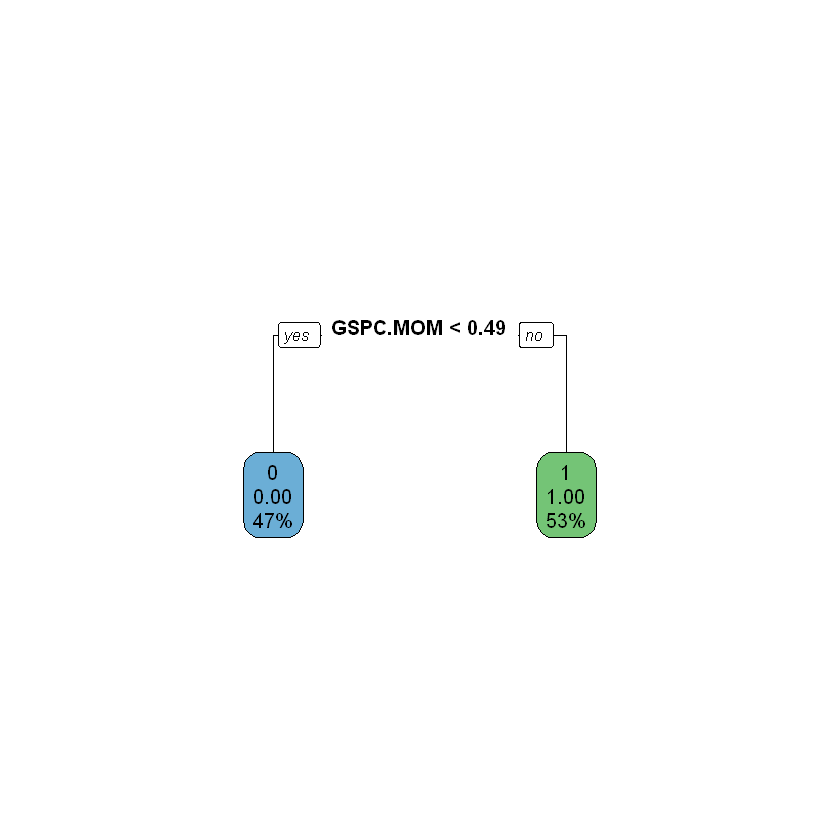

In [136]:
# Criação da árvore gráfica
rpart.plot(train.minmax.model.dt, type = 0, extra = 106, tweak = 1) 

In [137]:
# Importância dos atributos
train.minmax.imp <- varImp(train.minmax.model.dt, scale = F)
train.minmax.imp

,Overall
GSPC.MOM,1838.0190
GSPC.Return,673.3009
GSPC.ROC,673.3009
GSPC.StochK,235.8079
GSPC.WPR,235.8079
GSPC.High,0.0000
GSPC.Low,0.0000
GSPC.Close,0.0000
GSPC.SMA,0.0000
GSPC.WMA,0.0000


In [138]:
# Previsão
train.minmax.dt.pred <- predict(train.minmax.model.dt,
                                GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))],
                                type = "class")

In [139]:
# Matriz de Confusão de treino
confusionMatrix(table(train.minmax.dt.pred,
                      GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))]$GSPC.Direction)) 

Confusion Matrix and Statistics

                    
train.minmax.dt.pred    0    1
                   0 1728    0
                   1    0 1963
                                    
               Accuracy : 1         
                 95% CI : (0.999, 1)
    No Information Rate : 0.5318    
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        
                                    
            Sensitivity : 1.0000    
            Specificity : 1.0000    
         Pos Pred Value : 1.0000    
         Neg Pred Value : 1.0000    
             Prevalence : 0.4682    
         Detection Rate : 0.4682    
   Detection Prevalence : 0.4682    
      Balanced Accuracy : 1.0000    
                                    
       'Positive' Class : 0         
                                    

Pelo % de acurácia, há indícios de *overfitting*.

**Dados de teste**

In [140]:
# Previsão
test.minmax.dt.pred <- predict(train.minmax.model.dt,
                               GSPC.minmax.test[, !(names(GSPC.minmax.test) %in% c('GSPC.Trend'))],
                               type = "class")

In [141]:
# Matriz de Confusão de teste
confusionMatrix(table(test.minmax.dt.pred,
                      GSPC.minmax.test[, !(names(GSPC.minmax.test) %in% c('GSPC.Trend'))]$GSPC.Direction)) 

Confusion Matrix and Statistics

                   
test.minmax.dt.pred   0   1
                  0 719   0
                  1   0 886
                                     
               Accuracy : 1          
                 95% CI : (0.9977, 1)
    No Information Rate : 0.552      
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.000      
            Specificity : 1.000      
         Pos Pred Value : 1.000      
         Neg Pred Value : 1.000      
             Prevalence : 0.448      
         Detection Rate : 0.448      
   Detection Prevalence : 0.448      
      Balanced Accuracy : 1.000      
                                     
       'Positive' Class : 0          
                                     

Pelo % de acurácia, há indícios de *overfitting*.

## 7.3. Random Forest

O algoritmo de *random forest* trabalha agregando as predições realizadas pelas diversas *decision trees* de profundidade variável. Cada *decision tree* no algoritmo é treinado em um subconjunto de dataset (*bootstrapped dataset*).

A porção de amostras que foram deixadas durante a construção de cada decision tree no algoritmo é referenciada como *dataset out-of-bag* (OOB). O modelo irá automaticamente avaliar automaticamente seu desempenho rudando cada uma das amostras no dataset OOB através do algoritmo de *random forest*.

O critério de decisão para divisão de uma *decision tree* é por meio da impureza produzida por cada *feature* utilizando o índice de Gini ou entropia. No algoritmo de *random forest*, seleciona-se aleatoriamente um número predefinido de *features* candidatas. O último resultará em uma variância maior entre as árvores que, de certa forma, contenha as mesmas *features* (ou seja, aquelas que são altamente correlacionadas com o rótulo alvo).

Quando o algoritmo de *random forest* é utilizado para classificação e é apresentado com uma nova amostra, a predição final é feita tomando a maioria das predições realizadas por cada *decision treee* no *random forest*.

Obs.: *cross-validation* => utilizado para avaliar a eficiência de um modelo utilizando os dados de treinamento.

In [142]:
# Package
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked _by_ '.GlobalEnv':

    outlier

The following object is masked from 'package:ggplot2':

    margin



### 7.3.1. Dados z-score

**Dados de treino**

In [145]:
# Sintaxe básica
set.seed(123)
zscore.model.rf <- randomForest(as.factor(GSPC.Trend) ~ ., 
                                data = GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction'))],
                                method = 'rf',
                                trControl = trainControl(method = 'cv', number = 5))
zscore.model.rf

# data = GSPC.zscore.train.rf => dados de treino
# method = 'rf' => utilização do algoritmo de random forest
# method = 'cv' => validação cruzada
# number = 5 => 5 folds for cross-validation


Call:
 randomForest(formula = as.factor(GSPC.Trend) ~ ., data = GSPC.zscore.train[,      !(names(GSPC.zscore.train) %in% c("GSPC.Direction"))], method = "rf",      trControl = trainControl(method = "cv", number = 5)) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 0.08%
Confusion matrix:
        down nowhere   up class.error
down    1733       0    0           0
nowhere    2       0    1           1
up         0       0 1966           0

Por default, o número de *decision trees* no *random forest* é 500 e o número de *features* utilizadas como candidatas potenciais para cada divisão é 3. O modelo automaticamente tentará classificar cada uma das amostras no dataset OOB e mostrará uma matriz de confusão com os resultados.

Uma vez que este é um problema de classificação, utiliza-se uma matriz de confusão para avaliar o desempenho do modelo.

**Dados de teste**

In [149]:
# Previsão
test.zscore.rf.pred <- predict(zscore.model.rf,
                               GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Direction'))])

In [150]:
# Matriz de Confusão de teste
confusionMatrix(table(GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Direction'))]$GSPC.Trend,
                      test.zscore.rf.pred))

Confusion Matrix and Statistics

         test.zscore.rf.pred
          down nowhere  up
  down     714       0   0
  nowhere    0       0   0
  up         0       0 880

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9977, 1)
    No Information Rate : 0.5521     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               1.0000             NA    1.0000
Specificity               1.0000              1    1.0000
Pos Pred Value            1.0000             NA    1.0000
Neg Pred Value            1.0000             NA    1.0000
Prevalence                0.4479              0    0.5521
Detection Rate            0.4479              0    0.5521
Detection Prevalence      0.4479       

### 7.3.2. Dados minmax

**Dados de treino**

In [151]:
# Sintaxe básica
set.seed(123)
minmax.model.rf <- randomForest(as.factor(GSPC.Trend) ~ ., 
                                data = GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction'))], 
                                method = 'rf',
                                trControl = trainControl(method = 'cv', number = 5))
minmax.model.rf

# data = GSPC.zscore.train.rf => dados de treino
# method = 'rf' => utilização do algoritmo de random forest
# method = 'cv' => validação cruzada
# number = 5 => 5 folds for cross-validation


Call:
 randomForest(formula = as.factor(GSPC.Trend) ~ ., data = GSPC.minmax.train[,      !(names(GSPC.minmax.train) %in% c("GSPC.Direction"))], method = "rf",      trControl = trainControl(method = "cv", number = 5)) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 0.08%
Confusion matrix:
        down nowhere   up class.error
down    1728       0    0           0
nowhere    3       0    0           1
up         0       0 1960           0

In [228]:
# Previsão
train.minmax.rf.pred <- predict(minmax.model.rf, 
                                GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))])

In [229]:
# Matriz de Confusão de teste
confusionMatrix(table(GSPC.minmax.train$GSPC.Trend, train.minmax.rf.pred))

         train.minmax.rf.pred
          down nowhere   up
  down    1712       0    0
  nowhere    0       3    0
  up         0       0 2009

**Dados de teste**

In [152]:
# Previsão
test.minmax.rf.pred <- predict(minmax.model.rf,
                               GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction'))])

In [153]:
# Matriz de Confusão de teste
confusionMatrix(table(GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction'))]$GSPC.Trend,
                      test.minmax.rf.pred))

Confusion Matrix and Statistics

         test.minmax.rf.pred
          down nowhere   up
  down    1728       0    0
  nowhere    0       3    0
  up         0       0 1960

Overall Statistics
                                    
               Accuracy : 1         
                 95% CI : (0.999, 1)
    No Information Rate : 0.531     
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               1.0000      1.0000000     1.000
Specificity               1.0000      1.0000000     1.000
Pos Pred Value            1.0000      1.0000000     1.000
Neg Pred Value            1.0000      1.0000000     1.000
Prevalence                0.4682      0.0008128     0.531
Detection Rate            0.4682      0.0008128     0.531
Detection Prevalence      0.4682      0.0008

## 7.4. K Nearest Neighborhood

In [154]:
# Package
library(class)

In [155]:
# Definição do número de Neighborhoods    
neighborhood <- 3

# O número de neighborhoods corresponde ao número de direções (Up, Down, NoWhere)

### 7.4.1. Dados z-score

**Dados de treino**

In [157]:
# modelo avaliado por treino
set.seed(123)
train.zscore.knn.model <- knn(GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              as.factor(GSPC.zscore.train$GSPC.Trend), neighborhood)   
head(train.zscore.knn.model)

[1] up   down up   up   down up  
Levels: down nowhere up

In [158]:
# Matriz de Confusão de treino
confusionMatrix(table(train.zscore.knn.model,
                      as.factor(GSPC.zscore.train$GSPC.Trend))) 

Confusion Matrix and Statistics

                      
train.zscore.knn.model down nowhere   up
               down    1622       2   96
               nowhere    0       0    0
               up       111       1 1870

Overall Statistics
                                          
               Accuracy : 0.9433          
                 95% CI : (0.9353, 0.9505)
    No Information Rate : 0.5311          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8861          
                                          
 Mcnemar's Test P-Value : 0.2522          

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               0.9359      0.0000000    0.9512
Specificity               0.9502      1.0000000    0.9355
Pos Pred Value            0.9430            NaN    0.9435
Neg Pred Value            0.9440      0.9991896    0.9442
Prevalence                0.4681      0.0008104    0.5311
De

**Dados de teste**

In [159]:
set.seed(123)
test.zscore.knn.model <- knn(GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              GSPC.zscore.test[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              as.factor(GSPC.zscore.train$GSPC.Trend), neighborhood)   
head(test.zscore.knn.model)

[1] down down down down down down
Levels: down nowhere up

In [160]:
# Matriz de Confusão de teste
confusionMatrix(table(test.zscore.knn.model, as.factor(GSPC.zscore.test$GSPC.Trend))) 

Confusion Matrix and Statistics

                     
test.zscore.knn.model down nowhere  up
              down     595       0 107
              nowhere    0       0   0
              up       119       0 773

Overall Statistics
                                         
               Accuracy : 0.8582         
                 95% CI : (0.8401, 0.875)
    No Information Rate : 0.5521         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7129         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               0.8333             NA    0.8784
Specificity               0.8784              1    0.8333
Pos Pred Value            0.8476             NA    0.8666
Neg Pred Value            0.8666             NA    0.8476
Prevalence                0.4479              0    0.5521
Detection Rate      

### 7.4.2. Dados minmax

**Dados de treino**

In [161]:
# modelo avaliado por treino
set.seed(123)
train.minmax.knn.model <- knn(GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              as.factor(GSPC.minmax.train$GSPC.Trend), neighborhood)   
head(train.minmax.knn.model)

[1] down down down down up   down
Levels: down nowhere up

In [162]:
# Matriz de Confusão de treino
confusionMatrix(table(train.minmax.knn.model, as.factor(GSPC.minmax.train$GSPC.Trend))) 

Confusion Matrix and Statistics

                      
train.minmax.knn.model down nowhere   up
               down    1627       1   97
               nowhere    1       1    0
               up       100       1 1863

Overall Statistics
                                         
               Accuracy : 0.9458         
                 95% CI : (0.938, 0.9529)
    No Information Rate : 0.531          
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.8913         
                                         
 Mcnemar's Test P-Value : 0.7902         

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               0.9416      0.3333333    0.9505
Specificity               0.9501      0.9997289    0.9417
Pos Pred Value            0.9432      0.5000000    0.9486
Neg Pred Value            0.9486      0.9994578    0.9438
Prevalence                0.4682      0.0008128    0.5310
Detection R

**Dados de teste**

In [163]:
set.seed(123)
test.minmax.knn.model <- knn(GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              GSPC.minmax.test[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              as.factor(GSPC.minmax.train$GSPC.Trend), neighborhood)   
head(test.minmax.knn.model)

[1] down down down down up   down
Levels: down nowhere up

In [164]:
# Matriz de Confusão de teste
confusionMatrix(table(test.minmax.knn.model, as.factor(GSPC.minmax.test$GSPC.Trend))) 

Confusion Matrix and Statistics

                     
test.minmax.knn.model down nowhere  up
              down     636       0  87
              nowhere    0       0   0
              up        83       0 799

Overall Statistics
                                         
               Accuracy : 0.8941         
                 95% CI : (0.878, 0.9087)
    No Information Rate : 0.552          
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.786          
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               0.8846             NA    0.9018
Specificity               0.9018              1    0.8846
Pos Pred Value            0.8797             NA    0.9059
Neg Pred Value            0.9059             NA    0.8797
Prevalence                0.4480              0    0.5520
Detection Rate      

## 7.5. Support Vector Machine

### 7.5.1. Dados z-score

**Dados de treino**

In [165]:
train.zscore.svm.model <- svm(GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))],
                              as.factor(GSPC.zscore.train$GSPC.Trend))    
head(train.zscore.svm.model)

$call
svm.default(x = GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% 
    c("GSPC.Direction", "GSPC.Trend"))], y = as.factor(GSPC.zscore.train$GSPC.Trend))

$type
[1] 0

$kernel
[1] 2

$cost
[1] 1

$degree
[1] 3

$gamma
[1] 0.05555556


In [166]:
# Predição
train.zscore.svm.pred <- predict(train.zscore.svm.model,
                                 GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))]) 

# Matriz de Confusão
confusionMatrix(table(train.zscore.svm.pred, as.factor(GSPC.zscore.train$GSPC.Trend)))

Confusion Matrix and Statistics

                     
train.zscore.svm.pred down nowhere   up
              down    1675       1   31
              nowhere    0       0    0
              up        58       2 1935

Overall Statistics
                                          
               Accuracy : 0.9751          
                 95% CI : (0.9696, 0.9799)
    No Information Rate : 0.5311          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9501          
                                          
 Mcnemar's Test P-Value : 0.01074         

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               0.9665      0.0000000    0.9842
Specificity               0.9837      1.0000000    0.9654
Pos Pred Value            0.9813            NaN    0.9699
Neg Pred Value            0.9709      0.9991896    0.9818
Prevalence                0.4681      0.0008104    0.5311
Detecti

**Dados de teste**

In [167]:
# Predição
test.zscore.svm.pred <- predict(train.zscore.svm.model,
                                GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Direction', 'GSPC.Trend'))]) 

# Matriz de Confusão
confusionMatrix(table(test.zscore.svm.pred, as.factor(GSPC.zscore.test$GSPC.Trend)))

Confusion Matrix and Statistics

                    
test.zscore.svm.pred down nowhere  up
             down     686       0  24
             nowhere    0       0   0
             up        28       0 856

Overall Statistics
                                          
               Accuracy : 0.9674          
                 95% CI : (0.9574, 0.9755)
    No Information Rate : 0.5521          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.934           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               0.9608             NA    0.9727
Specificity               0.9727              1    0.9608
Pos Pred Value            0.9662             NA    0.9683
Neg Pred Value            0.9683             NA    0.9662
Prevalence                0.4479              0    0.5521
Detection Rate  

### 7.5.2. Dados minmax

**Dados de treino**

In [168]:
train.minmax.svm.model <- svm(GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))],
                              as.factor(GSPC.minmax.train$GSPC.Trend))    
head(train.minmax.svm.model)

$call
svm.default(x = GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% 
    c("GSPC.Direction", "GSPC.Trend"))], y = as.factor(GSPC.minmax.train$GSPC.Trend))

$type
[1] 0

$kernel
[1] 2

$cost
[1] 1

$degree
[1] 3

$gamma
[1] 0.05882353


In [169]:
# Predição
train.minmax.svm.pred <- predict(train.minmax.svm.model,
                                 GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))]) 

# Matriz de Confusão
confusionMatrix(table(train.minmax.svm.pred, as.factor(GSPC.minmax.train$GSPC.Trend)))

Confusion Matrix and Statistics

                     
train.minmax.svm.pred down nowhere   up
              down    1686       2   31
              nowhere    0       0    0
              up        42       1 1929

Overall Statistics
                                          
               Accuracy : 0.9794          
                 95% CI : (0.9743, 0.9837)
    No Information Rate : 0.531           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9587          
                                          
 Mcnemar's Test P-Value : 0.1987          

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               0.9757      0.0000000    0.9842
Specificity               0.9832      1.0000000    0.9752
Pos Pred Value            0.9808            NaN    0.9782
Neg Pred Value            0.9787      0.9991872    0.9820
Prevalence                0.4682      0.0008128    0.5310
Detecti

**Dados de teste**

In [170]:
# Predição
test.minmax.svm.pred <- predict(train.minmax.svm.model,
                                GSPC.minmax.test[, !(names(GSPC.minmax.test) %in% c('GSPC.Direction', 'GSPC.Trend'))]) 

# Matriz de Confusão
confusionMatrix(table(test.minmax.svm.pred, as.factor(GSPC.minmax.test$GSPC.Trend)))

Confusion Matrix and Statistics

                    
test.minmax.svm.pred down nowhere  up
             down     699       0  22
             nowhere    0       0   0
             up        20       0 864

Overall Statistics
                                          
               Accuracy : 0.9738          
                 95% CI : (0.9648, 0.9811)
    No Information Rate : 0.552           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9471          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               0.9722             NA    0.9752
Specificity               0.9752              1    0.9722
Pos Pred Value            0.9695             NA    0.9774
Neg Pred Value            0.9774             NA    0.9695
Prevalence                0.4480              0    0.5520
Detection Rate  